# FOOD DELIVERY TIME

In [1]:
# Load data manipulation package
import numpy as np
import pandas as pd

# Load data visualization package
import matplotlib.pyplot as plt
import seaborn as sns

# Load statistics package
import statistics
import scipy.stats as stats

# Load model package
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.base import BaseEstimator, RegressorMixin
from sklearn.model_selection import cross_val_score, cross_validate, KFold
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

## 1. Load Data

In [2]:
# Import dataset from csv file
data = pd.read_csv('delivery_food_-_train.csv')

# Table check
data.head()

ID Delivery_person_ID Delivery_person_Age Delivery_person_Ratings  \
0  0x4607     INDORES13DEL02                   37                     4.9   
1  0xb379     BANGRES18DEL02                   34                     4.5   
2  0x5d6d     BANGRES19DEL01                   23                     4.4   
3  0x7a6a    COIMBRES13DEL02                   38                     4.7   
4  0x70a2     CHENRES12DEL01                   32                     4.6   

   Restaurant_latitude  Restaurant_longitude  Delivery_location_latitude  \
0            22.745049             75.892471                   22.765049   
1            12.913041             77.683237                   13.043041   
2            12.914264             77.678400                   12.924264   
3            11.003669             76.976494                   11.053669   
4            12.972793             80.249982                   13.012793   

   Delivery_location_longitude  Order_Date Time_Orderd Time_Order_picked  \
0                    75.912471  19-03-2022    11:30:00          11:45:00   
1                    77.813237  25-03-2022    19:45:00          19:50:00   
2                    77.688400  19-03-2022    08:30:00          08:45:00   
3                    77.026494  05-04-2022    18:00:00          18:10:00   
4                    80.289982  26-03-2022    13:30:00          13:45:00   

       Weatherconditions Road_traffic_density  Vehicle_condition  \
0       conditions Sunny                High                   2   
1      conditions Stormy                 Jam                   2   
2  conditions Sandstorms                 Low                   0   
3       conditions Sunny              Medium                   0   
4      conditions Cloudy                High                   1   

  Type_of_order Type_of_vehicle multiple_deliveries Festival            City  \
0        Snack      motorcycle                    0      No           Urban    
1        Snack         scooter                    1      No   Metropolitian    
2       Drinks      motorcycle                    1      No           Urban    
3       Buffet      motorcycle                    1      No   Metropolitian    
4        Snack         scooter                    1      No   Metropolitian    

  Time_taken(min)  
0        (min) 24  
1        (min) 33  
2        (min) 26  
3        (min) 21  
4        (min) 30

In [3]:
# Data info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45593 entries, 0 to 45592
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           45593 non-null  object 
 1   Delivery_person_ID           45593 non-null  object 
 2   Delivery_person_Age          45593 non-null  object 
 3   Delivery_person_Ratings      45593 non-null  object 
 4   Restaurant_latitude          45593 non-null  float64
 5   Restaurant_longitude         45593 non-null  float64
 6   Delivery_location_latitude   45593 non-null  float64
 7   Delivery_location_longitude  45593 non-null  float64
 8   Order_Date                   45593 non-null  object 
 9   Time_Orderd                  45593 non-null  object 
 10  Time_Order_picked            45593 non-null  object 
 11  Weatherconditions            45593 non-null  object 
 12  Road_traffic_density         45593 non-null  object 
 13  Vehicle_conditio

### Describe data

In [4]:
data.describe().T

count       mean        std        min  \
Restaurant_latitude          45593.0  17.017729   8.185109 -30.905562   
Restaurant_longitude         45593.0  70.231332  22.883647 -88.366217   
Delivery_location_latitude   45593.0  17.465186   7.335122   0.010000   
Delivery_location_longitude  45593.0  70.845702  21.118812   0.010000   
Vehicle_condition            45593.0   1.023359   0.839065   0.000000   

                                   25%        50%        75%        max  
Restaurant_latitude          12.933284  18.546947  22.728163  30.914057  
Restaurant_longitude         73.170000  75.898497  78.044095  88.433452  
Delivery_location_latitude   12.988453  18.633934  22.785049  31.054057  
Delivery_location_longitude  73.280000  76.002574  78.107044  88.563452  
Vehicle_condition             0.000000   1.000000   2.000000   3.000000

In [5]:
data.describe(exclude = np.number).T

count unique              top   freq
ID                       45593  45593          0x4607       1
Delivery_person_ID       45593   1320  PUNERES01DEL01      67
Delivery_person_Age      45593     23               35   2262
Delivery_person_Ratings  45593     29              4.8   7148
Order_Date               45593     44       15-03-2022   1192
Time_Orderd              45593    177             NaN    1731
Time_Order_picked        45593    193         21:30:00    496
Weatherconditions        45593      7   conditions Fog   7654
Road_traffic_density     45593      5             Low   15477
Type_of_order            45593      4           Snack   11533
Type_of_vehicle          45593      4      motorcycle   26435
multiple_deliveries      45593      5                1  28159
Festival                 45593      3              No   44469
City                     45593      4   Metropolitian   34093
Time_taken(min)          45593     45         (min) 26   2123

**Common factors influence delivery time:**
1. Delivery object:
    - type of food
    - preparation time
    
2. Delivery person:
    - age
    - ratings
    - vehicles (type & condition)
    
3. Destinations:
    - distance
    - multiple
    - traffic
    - day
    - weather
    - festival

**Insights:**
1. There are null values present in 'NaN' string.
2. Drop ID & Delivery_person_ID columns that will not be used to build the model.
3. Data conversion for some predictors.
4. Value extraction such as distance, preparation time, etc.

## 2. Data Cleaning

### 2.1. 'NaN' value inspection

In [6]:
# Convert string 'NaN' to np.nan
data.replace('NaN', float(np.nan), regex = True, inplace = True)

# Check null values
data.isnull().sum().sort_values(ascending = False)

Delivery_person_Ratings        1908
Delivery_person_Age            1854
Time_Orderd                    1731
City                           1200
multiple_deliveries             993
Weatherconditions               616
Road_traffic_density            601
Festival                        228
ID                                0
Type_of_vehicle                   0
Type_of_order                     0
Vehicle_condition                 0
Time_Order_picked                 0
Delivery_person_ID                0
Order_Date                        0
Delivery_location_longitude       0
Delivery_location_latitude        0
Restaurant_longitude              0
Restaurant_latitude               0
Time_taken(min)                   0
dtype: int64

In [7]:
# Drop 'NaN' data
data = data.dropna()

# Re-check null values
data.isnull().sum()

ID                             0
Delivery_person_ID             0
Delivery_person_Age            0
Delivery_person_Ratings        0
Restaurant_latitude            0
Restaurant_longitude           0
Delivery_location_latitude     0
Delivery_location_longitude    0
Order_Date                     0
Time_Orderd                    0
Time_Order_picked              0
Weatherconditions              0
Road_traffic_density           0
Vehicle_condition              0
Type_of_order                  0
Type_of_vehicle                0
multiple_deliveries            0
Festival                       0
City                           0
Time_taken(min)                0
dtype: int64

In [8]:
data.shape

(41368, 20)

### 2.2. Duplicate inspection

In [9]:
# Duplicates check
data[data.duplicated(keep = False)]

Empty DataFrame
Columns: [ID, Delivery_person_ID, Delivery_person_Age, Delivery_person_Ratings, Restaurant_latitude, Restaurant_longitude, Delivery_location_latitude, Delivery_location_longitude, Order_Date, Time_Orderd, Time_Order_picked, Weatherconditions, Road_traffic_density, Vehicle_condition, Type_of_order, Type_of_vehicle, multiple_deliveries, Festival, City, Time_taken(min)]
Index: []

In [10]:
# Duplicates check
if (data.duplicated().sum() > 0):
    print("There are duplicate values present.")
else:
    print("There is no duplicate value present.")

There is no duplicate value present.


**Drop unnecessary columns**

In [11]:
# Drop unnecessary columns
data.drop(['ID','Delivery_person_ID'], axis = 1, inplace = True)
data.shape

(41368, 18)

### 2.3. Data conversion

In [12]:
# Formatting datatypes
data['Delivery_person_Age'] = data['Delivery_person_Age'].astype('float64')
data['Delivery_person_Ratings'] = data['Delivery_person_Ratings'].astype('float64')
data['multiple_deliveries'] = data['multiple_deliveries'].astype('float64')
data['Order_Date'] = pd.to_datetime(data['Order_Date'], format = "%d-%m-%Y")

data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41368 entries, 0 to 45592
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Delivery_person_Age          41368 non-null  float64       
 1   Delivery_person_Ratings      41368 non-null  float64       
 2   Restaurant_latitude          41368 non-null  float64       
 3   Restaurant_longitude         41368 non-null  float64       
 4   Delivery_location_latitude   41368 non-null  float64       
 5   Delivery_location_longitude  41368 non-null  float64       
 6   Order_Date                   41368 non-null  datetime64[ns]
 7   Time_Orderd                  41368 non-null  object        
 8   Time_Order_picked            41368 non-null  object        
 9   Weatherconditions            41368 non-null  object        
 10  Road_traffic_density         41368 non-null  object        
 11  Vehicle_condition            41368 non-null  i

### 2.4. Value extraction

**Extract weather**

In [13]:
#Extract weather
data['Weatherconditions'] = data['Weatherconditions'].apply(lambda x: x.split(' ')[1].strip())
data['Weatherconditions'].head()

0         Sunny
1        Stormy
2    Sandstorms
3         Sunny
4        Cloudy
Name: Weatherconditions, dtype: object

**Extract 'Time_taken'**

In [14]:
#Extract 'Time_taken' and convert to float
data['Time_taken(min)'] = data['Time_taken(min)'].apply(lambda x: float(x.split(' ')[1].strip()))
data['Time_taken(min)'].head()

0    24.0
1    33.0
2    26.0
3    21.0
4    30.0
Name: Time_taken(min), dtype: float64

**Extract distance**

In [15]:
from geopy.distance import geodesic

# Calculate distance between restaurant location & delivery location
data['distance_KM'] = np.zeros(len(data))
restaurant_cordinates = data[['Restaurant_latitude', 'Restaurant_longitude']].to_numpy()
delivery_location_cordinates = data[['Delivery_location_latitude', 'Delivery_location_longitude']].to_numpy()

for i in range(len(data)):
    data['distance_KM'].loc[i] = geodesic(restaurant_cordinates[i], delivery_location_cordinates[i]).km
    
data['distance_KM'].head()

0     3.020737
1    20.143737
2     1.549693
3     7.774497
4     6.197898
Name: distance_KM, dtype: float64

**Extract preparation time**

In [16]:
# Convert to timedelta
data['Time_Orderd'] = pd.to_timedelta(data['Time_Orderd'])
data['Time_Order_picked'] = pd.to_timedelta(data['Time_Order_picked'])

# Calculate time difference
data['Time_Ordered_formatted'] = data['Order_Date'] + data['Time_Orderd']
data['Time_Order_picked_formatted'] = np.where(data['Time_Order_picked'] < data['Time_Orderd'],
                                               data['Order_Date'] + pd.DateOffset(1) + data['Time_Order_picked'],
                                               data['Order_Date'] + data['Time_Order_picked'])
data['preparation_time_mins'] = ((data['Time_Order_picked_formatted'] - data['Time_Ordered_formatted']).dt.total_seconds())/60
data['preparation_time_mins'].head()

0    15.0
1     5.0
2    15.0
3    10.0
4    15.0
Name: preparation_time_mins, dtype: float64

In [17]:
# Create time based feature
data['day_name'] = data.Order_Date.dt.day_name()
data['day_of_week'] = data.Order_Date.dt.day_of_week.astype(int)
data['is_weekend'] = np.where(data['day_of_week'].isin([5, 6]), 1, 0)

# data['day'] = data.Order_Date.dt.day
# data['week'] = data.Order_Date.dt.isocalendar().week
# data['month'] = data.Order_Date.dt.month
# data['quarter'] = data.Order_Date.dt.quarter
# data['year'] = data.Order_Date.dt.year
# data['hour'] = data.Time_Orderd.dt.components['hours']
# data['dayofyear'] = data.Order_Date.dt.dayofyear
# data['day_of_week'] = data.Order_Date.dt.day_of_week.astype(int)
# data['is_month_start'] = data.Order_Date.dt.is_month_start.astype(int)
# data['is_month_end'] = data.Order_Date.dt.is_month_end.astype(int)
# data['is_quarter_start'] = data.Order_Date.dt.is_quarter_start.astype(int)
# data['is_quarter_end'] = data.Order_Date.dt.is_quarter_end.astype(int)
# data['is_year_start'] = data.Order_Date.dt.is_year_start.astype(int)
# data['is_year_end'] = data.Order_Date.dt.is_year_end.astype(int)
# data['is_leap_year'] = data.Order_Date.dt.is_leap_year.astype(int)
# data['days_in_month'] = data.Order_Date.dt.days_in_month

# Show table
pd.set_option('display.max_columns', None)
data.head()

Delivery_person_Age  Delivery_person_Ratings  Restaurant_latitude  \
0                 37.0                      4.9            22.745049   
1                 34.0                      4.5            12.913041   
2                 23.0                      4.4            12.914264   
3                 38.0                      4.7            11.003669   
4                 32.0                      4.6            12.972793   

   Restaurant_longitude  Delivery_location_latitude  \
0             75.892471                   22.765049   
1             77.683237                   13.043041   
2             77.678400                   12.924264   
3             76.976494                   11.053669   
4             80.249982                   13.012793   

   Delivery_location_longitude Order_Date     Time_Orderd Time_Order_picked  \
0                    75.912471 2022-03-19 0 days 11:30:00   0 days 11:45:00   
1                    77.813237 2022-03-25 0 days 19:45:00   0 days 19:50:00   
2                    77.688400 2022-03-19 0 days 08:30:00   0 days 08:45:00   
3                    77.026494 2022-04-05 0 days 18:00:00   0 days 18:10:00   
4                    80.289982 2022-03-26 0 days 13:30:00   0 days 13:45:00   

  Weatherconditions Road_traffic_density  Vehicle_condition Type_of_order  \
0             Sunny                High                   2        Snack    
1            Stormy                 Jam                   2        Snack    
2        Sandstorms                 Low                   0       Drinks    
3             Sunny              Medium                   0       Buffet    
4            Cloudy                High                   1        Snack    

  Type_of_vehicle  multiple_deliveries Festival            City  \
0     motorcycle                   0.0      No           Urban    
1        scooter                   1.0      No   Metropolitian    
2     motorcycle                   1.0      No           Urban    
3     motorcycle                   1.0      No   Metropolitian    
4        scooter                   1.0      No   Metropolitian    

   Time_taken(min)  distance_KM Time_Ordered_formatted  \
0             24.0     3.020737    2022-03-19 11:30:00   
1             33.0    20.143737    2022-03-25 19:45:00   
2             26.0     1.549693    2022-03-19 08:30:00   
3             21.0     7.774497    2022-04-05 18:00:00   
4             30.0     6.197898    2022-03-26 13:30:00   

  Time_Order_picked_formatted  preparation_time_mins  day_name  day_of_week  \
0         2022-03-19 11:45:00                   15.0  Saturday            5   
1         2022-03-25 19:50:00                    5.0    Friday            4   
2         2022-03-19 08:45:00                   15.0  Saturday            5   
3         2022-04-05 18:10:00                   10.0   Tuesday            1   
4         2022-03-26 13:45:00                   15.0  Saturday            5   

   is_weekend  
0           1  
1           0  
2           1  
3           0  
4           1

### 2.5. Predictors selection

In [18]:
# Predictors selection
predictors = ['Type_of_order', 'preparation_time_mins', 'Delivery_person_Age', 'Delivery_person_Ratings', 'Type_of_vehicle',
              'Vehicle_condition', 'distance_KM', 'multiple_deliveries', 'Road_traffic_density', 'day_name', 'is_weekend',
              'Weatherconditions', 'Festival', 'Time_taken(min)']

df = data[predictors]
df.head()

Type_of_order  preparation_time_mins  Delivery_person_Age  \
0        Snack                    15.0                 37.0   
1        Snack                     5.0                 34.0   
2       Drinks                    15.0                 23.0   
3       Buffet                    10.0                 38.0   
4        Snack                    15.0                 32.0   

   Delivery_person_Ratings Type_of_vehicle  Vehicle_condition  distance_KM  \
0                      4.9     motorcycle                   2     3.020737   
1                      4.5        scooter                   2    20.143737   
2                      4.4     motorcycle                   0     1.549693   
3                      4.7     motorcycle                   0     7.774497   
4                      4.6        scooter                   1     6.197898   

   multiple_deliveries Road_traffic_density  day_name  is_weekend  \
0                  0.0                High   Saturday           1   
1                  1.0                 Jam     Friday           0   
2                  1.0                 Low   Saturday           1   
3                  1.0              Medium    Tuesday           0   
4                  1.0                High   Saturday           1   

  Weatherconditions Festival  Time_taken(min)  
0             Sunny      No              24.0  
1            Stormy      No              33.0  
2        Sandstorms      No              26.0  
3             Sunny      No              21.0  
4            Cloudy      No              30.0

In [19]:
# Data info
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41368 entries, 0 to 45592
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Type_of_order            41368 non-null  object 
 1   preparation_time_mins    41368 non-null  float64
 2   Delivery_person_Age      41368 non-null  float64
 3   Delivery_person_Ratings  41368 non-null  float64
 4   Type_of_vehicle          41368 non-null  object 
 5   Vehicle_condition        41368 non-null  int64  
 6   distance_KM              41368 non-null  float64
 7   multiple_deliveries      41368 non-null  float64
 8   Road_traffic_density     41368 non-null  object 
 9   day_name                 41368 non-null  object 
 10  is_weekend               41368 non-null  int32  
 11  Weatherconditions        41368 non-null  object 
 12  Festival                 41368 non-null  object 
 13  Time_taken(min)          41368 non-null  float64
dtypes: float64(6), int32(1), in

### 2.6. Outliers inspection

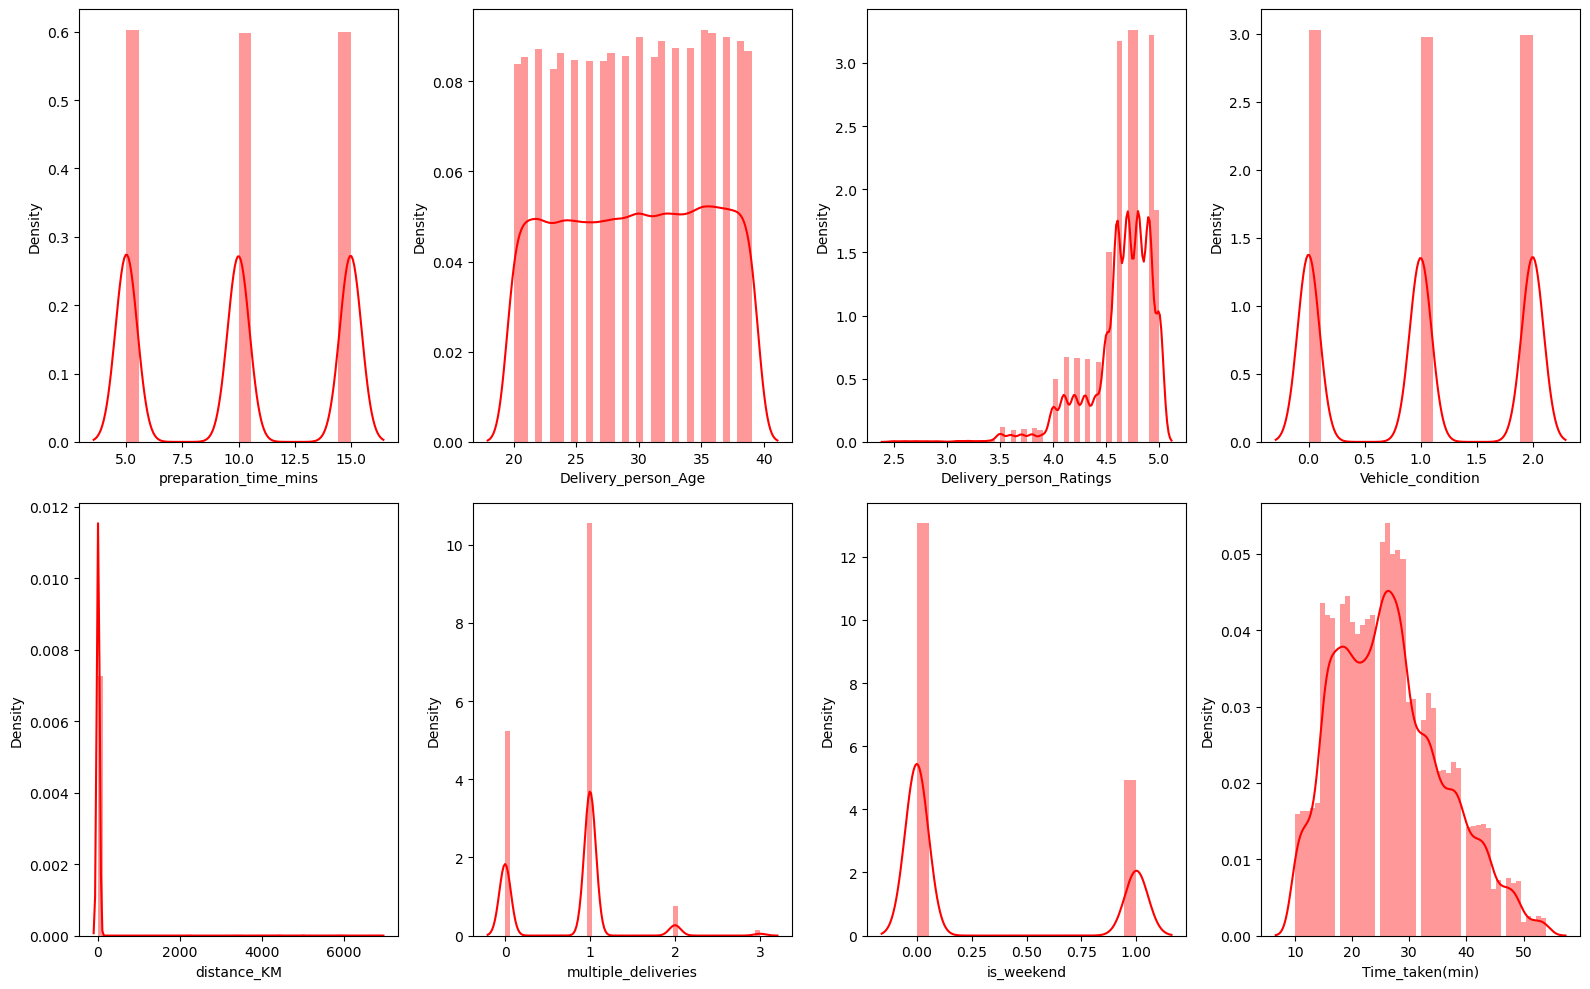

In [20]:
fig, ax = plt.subplots(nrows = 2, ncols = 4, figsize = (16, 10))

columns = list(df.select_dtypes(exclude = ['object']).columns)
k = 0
for i in range(2):
    for j in range(4):
            sns.distplot(df[columns[k]], ax = ax[i][j], color = 'red')
            k += 1

plt.tight_layout()
plt.show()

- There are outliers in 'distance_KM' column.
- Remove outliers by IQR.

In [21]:
# Describe 'distance_KM'
df[['distance_KM']].describe().T

count       mean         std  min       25%       50%  \
distance_KM  41368.0  24.172582  282.849958  0.0  3.138069  8.927154   

                   75%          max  
distance_KM  13.393837  6852.617172

<AxesSubplot:xlabel='distance_KM', ylabel='Density'>

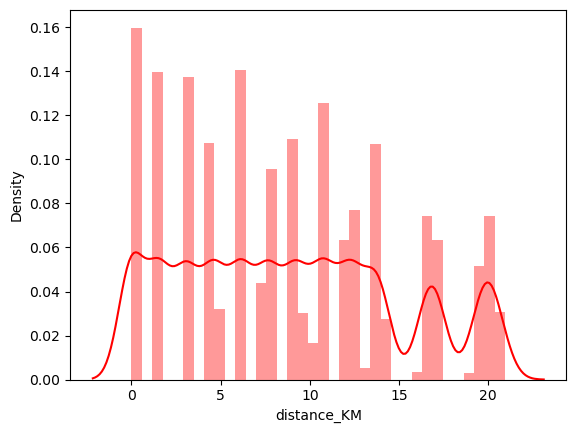

In [22]:
# Drop outliers
columns_drop = ['distance_KM']

for index, i in enumerate(columns_drop):
    q1 = df[i].quantile(0.25)
    q3 = df[i].quantile(0.75)
    iqr = q3 - q1
    lowerbound = q1 - 1.5*iqr
    upperbound = q3 + 1.5*iqr
    outliers = df[(df[i] < lowerbound) | (df[i] > upperbound)]
    df = df.drop(outliers.index)
    
# Plot columns
sns.distplot(df['distance_KM'], color = 'red')

In [23]:
# Show data where 'distance_KM' equals to 0
df[(df['distance_KM'] == 0)]

Type_of_order  preparation_time_mins  Delivery_person_Age  \
41368       Drinks                     5.0                 32.0   
41369       Buffet                    15.0                 33.0   
41370       Buffet                    15.0                 20.0   
41371        Snack                     5.0                 26.0   
41372        Snack                    10.0                 38.0   
...             ...                    ...                  ...   
45588         Meal                    10.0                 30.0   
45589       Buffet                    15.0                 21.0   
45590       Drinks                    15.0                 30.0   
45591        Snack                     5.0                 20.0   
45592        Snack                     5.0                 23.0   

       Delivery_person_Ratings Type_of_vehicle  Vehicle_condition  \
41368                      5.0        scooter                   1   
41369                      5.0     motorcycle                   1   
41370                      4.6     motorcycle                   0   
41371                      4.6     motorcycle                   1   
41372                      5.0        scooter                   2   
...                        ...             ...                ...   
45588                      4.8     motorcycle                   1   
45589                      4.6     motorcycle                   0   
45590                      4.9        scooter                   1   
45591                      4.7     motorcycle                   0   
45592                      4.9        scooter                   2   

       distance_KM  multiple_deliveries Road_traffic_density   day_name  \
41368          0.0                  1.0                 Jam    Saturday   
41369          0.0                  0.0                 Jam      Friday   
41370          0.0                  1.0                 Low    Thursday   
41371          0.0                  1.0              Medium    Saturday   
41372          0.0                  1.0                 Jam      Friday   
...            ...                  ...                  ...        ...   
45588          0.0                  0.0                High    Thursday   
45589          0.0                  1.0                 Jam   Wednesday   
45590          0.0                  0.0                 Low      Friday   
45591          0.0                  1.0                High      Monday   
45592          0.0                  1.0              Medium   Wednesday   

       is_weekend Weatherconditions Festival  Time_taken(min)  
41368           1             Sunny      No              15.0  
41369           0            Cloudy      No              28.0  
41370           0            Cloudy      No              23.0  
41371           1             Windy      No              26.0  
41372           0        Sandstorms      No              32.0  
...           ...               ...      ...              ...  
45588           0             Windy      No              32.0  
45589           0             Windy      No              36.0  
45590           0            Cloudy      No              16.0  
45591           0            Cloudy      No              26.0  
45592           0               Fog      No              36.0  

[3835 rows x 14 columns]

In [24]:
# Drop data where 'distance_KM' equals to 0
df = df.drop(df[(df['distance_KM'] == 0)].index)

# Reset index
df.reset_index(drop = True, inplace = True)
df

Type_of_order  preparation_time_mins  Delivery_person_Age  \
0            Snack                    15.0                 37.0   
1            Snack                     5.0                 34.0   
2           Drinks                    15.0                 23.0   
3           Buffet                    10.0                 38.0   
4            Snack                    15.0                 32.0   
...             ...                    ...                  ...   
37397       Drinks                    10.0                 35.0   
37398         Meal                    15.0                 33.0   
37399       Drinks                    10.0                 22.0   
37400       Drinks                    15.0                 35.0   
37401       Buffet                    15.0                 29.0   

       Delivery_person_Ratings Type_of_vehicle  Vehicle_condition  \
0                          4.9     motorcycle                   2   
1                          4.5        scooter                   2   
2                          4.4     motorcycle                   0   
3                          4.7     motorcycle                   0   
4                          4.6        scooter                   1   
...                        ...             ...                ...   
37397                      4.6     motorcycle                   2   
37398                      5.0     motorcycle                   0   
37399                      4.7     motorcycle                   0   
37400                      3.6     motorcycle                   2   
37401                      4.6     motorcycle                   0   

       distance_KM  multiple_deliveries Road_traffic_density  day_name  \
0         3.020737                  0.0                High   Saturday   
1        20.143737                  1.0                 Jam     Friday   
2         1.549693                  1.0                 Low   Saturday   
3         7.774497                  1.0              Medium    Tuesday   
4         6.197898                  1.0                High   Saturday   
...            ...                  ...                  ...       ...   
37397    16.576800                  1.0                 Low     Friday   
37398     1.488112                  0.0                High   Saturday   
37399    10.983242                  0.0                 Low     Sunday   
37400     4.648024                  1.0                 Jam     Friday   
37401    12.057294                  0.0                 Low   Thursday   

       is_weekend Weatherconditions Festival  Time_taken(min)  
0               1             Sunny      No              24.0  
1               0            Stormy      No              33.0  
2               1        Sandstorms      No              26.0  
3               0             Sunny      No              21.0  
4               1            Cloudy      No              30.0  
...           ...               ...      ...              ...  
37397           0        Sandstorms      No              24.0  
37398           1               Fog      No              27.0  
37399           1             Sunny      No              20.0  
37400           0             Sunny      No              31.0  
37401           0            Cloudy      No              16.0  

[37402 rows x 14 columns]

In [25]:
# Describe 'distance_KM'
df[['distance_KM']].describe().T

count      mean       std       min       25%       50%  \
distance_KM  37402.0  9.746832  5.599935  1.463837  4.654149  9.204185   

                   75%        max  
distance_KM  13.660334  20.942906

## 3. Preprocessing Data

### 3.1. Rename columns

In [26]:
# Rename columns
df.rename(columns = {'Type_of_order' : 'Order_Type', 'preparation_time_mins' : 'Prep_Time', 
                     'Delivery_person_Age' : 'Person_Age', 'Delivery_person_Ratings' : 'Person_Rating', 
                     'Type_of_vehicle' : 'Vehicle_Type', 'Vehicle_condition' : 'Vehicle_Condition', 
                     'distance_KM' : 'Distance', 'multiple_deliveries' : 'Multiple_Deliveries', 
                     'Road_traffic_density' : 'Road_Traffic', 'day_name' : 'Day', 
                     'is_weekend' : 'Is_Weekend', 'Weatherconditions' : 'Weather', 
                     'Time_taken(min)' : 'Delivery_Time'}, inplace = True)

In [27]:
# Data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37402 entries, 0 to 37401
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Order_Type           37402 non-null  object 
 1   Prep_Time            37402 non-null  float64
 2   Person_Age           37402 non-null  float64
 3   Person_Rating        37402 non-null  float64
 4   Vehicle_Type         37402 non-null  object 
 5   Vehicle_Condition    37402 non-null  int64  
 6   Distance             37402 non-null  float64
 7   Multiple_Deliveries  37402 non-null  float64
 8   Road_Traffic         37402 non-null  object 
 9   Day                  37402 non-null  object 
 10  Is_Weekend           37402 non-null  int32  
 11  Weather              37402 non-null  object 
 12  Festival             37402 non-null  object 
 13  Delivery_Time        37402 non-null  float64
dtypes: float64(6), int32(1), int64(1), object(6)
memory usage: 3.9+ MB


In [28]:
df.head()

Order_Type  Prep_Time  Person_Age  Person_Rating Vehicle_Type  \
0     Snack        15.0        37.0            4.9  motorcycle    
1     Snack         5.0        34.0            4.5     scooter    
2    Drinks        15.0        23.0            4.4  motorcycle    
3    Buffet        10.0        38.0            4.7  motorcycle    
4     Snack        15.0        32.0            4.6     scooter    

   Vehicle_Condition   Distance  Multiple_Deliveries Road_Traffic       Day  \
0                  2   3.020737                  0.0        High   Saturday   
1                  2  20.143737                  1.0         Jam     Friday   
2                  0   1.549693                  1.0         Low   Saturday   
3                  0   7.774497                  1.0      Medium    Tuesday   
4                  1   6.197898                  1.0        High   Saturday   

   Is_Weekend     Weather Festival  Delivery_Time  
0           1       Sunny      No            24.0  
1           0      Stormy      No            33.0  
2           1  Sandstorms      No            26.0  
3           0       Sunny      No            21.0  
4           1      Cloudy      No            30.0

### 3.2. Label encoding

In [29]:
# Explore column object
for column in df.select_dtypes(include = object).columns:
    print(column)
    print(df[column].value_counts())
    print("------------------------------------")

Order_Type
Order_Type
Meal       9433
Snack      9398
Drinks     9322
Buffet     9249
Name: count, dtype: int64
------------------------------------
Vehicle_Type
Vehicle_Type
motorcycle           21933
scooter              12445
electric_scooter      3024
Name: count, dtype: int64
------------------------------------
Road_Traffic
Road_Traffic
Low        12672
Jam        11905
Medium      9127
High        3698
Name: count, dtype: int64
------------------------------------
Day
Day
Wednesday    5832
Friday       5784
Tuesday      5225
Thursday     5180
Saturday     5158
Monday       5128
Sunday       5095
Name: count, dtype: int64
------------------------------------
Weather
Weather
Fog           6479
Stormy        6317
Cloudy        6272
Sandstorms    6204
Windy         6178
Sunny         5952
Name: count, dtype: int64
------------------------------------
Festival
Festival
No      36638
Yes       764
Name: count, dtype: int64
------------------------------------


---
**Labeling for 'Road_Traffic'**

In [30]:
# Create label for 'Road_Traffic'
traffic_label = {'Low' : 0, 
                'Medium' : 1, 
                'High' : 2, 
                'Jam' : 3}

df['Road_Traffic'] = df['Road_Traffic'].replace(traffic_label, regex = True)
df['Road_Traffic'].value_counts()

Road_Traffic
0    12672
3    11905
1     9127
2     3698
Name: count, dtype: int64

**Labeling for 'Festival'**

In [31]:
# Create label for 'Festival'
df['Festival'] = LabelEncoder().fit_transform(df['Festival'])
df['Festival'].value_counts()

Festival
0    36638
1      764
Name: count, dtype: int64

---

In [32]:
# Show data
df.head()

Order_Type  Prep_Time  Person_Age  Person_Rating Vehicle_Type  \
0     Snack        15.0        37.0            4.9  motorcycle    
1     Snack         5.0        34.0            4.5     scooter    
2    Drinks        15.0        23.0            4.4  motorcycle    
3    Buffet        10.0        38.0            4.7  motorcycle    
4     Snack        15.0        32.0            4.6     scooter    

   Vehicle_Condition   Distance  Multiple_Deliveries  Road_Traffic       Day  \
0                  2   3.020737                  0.0             2  Saturday   
1                  2  20.143737                  1.0             3    Friday   
2                  0   1.549693                  1.0             0  Saturday   
3                  0   7.774497                  1.0             1   Tuesday   
4                  1   6.197898                  1.0             2  Saturday   

   Is_Weekend     Weather  Festival  Delivery_Time  
0           1       Sunny         0           24.0  
1           0      Stormy         0           33.0  
2           1  Sandstorms         0           26.0  
3           0       Sunny         0           21.0  
4           1      Cloudy         0           30.0

In [33]:
# Data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37402 entries, 0 to 37401
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Order_Type           37402 non-null  object 
 1   Prep_Time            37402 non-null  float64
 2   Person_Age           37402 non-null  float64
 3   Person_Rating        37402 non-null  float64
 4   Vehicle_Type         37402 non-null  object 
 5   Vehicle_Condition    37402 non-null  int64  
 6   Distance             37402 non-null  float64
 7   Multiple_Deliveries  37402 non-null  float64
 8   Road_Traffic         37402 non-null  int64  
 9   Day                  37402 non-null  object 
 10  Is_Weekend           37402 non-null  int32  
 11  Weather              37402 non-null  object 
 12  Festival             37402 non-null  int32  
 13  Delivery_Time        37402 non-null  float64
dtypes: float64(6), int32(2), int64(2), object(4)
memory usage: 3.7+ MB


## 4. Exploratory Data Analysis

**Sort numeric predictors by correlation value**

<AxesSubplot:>

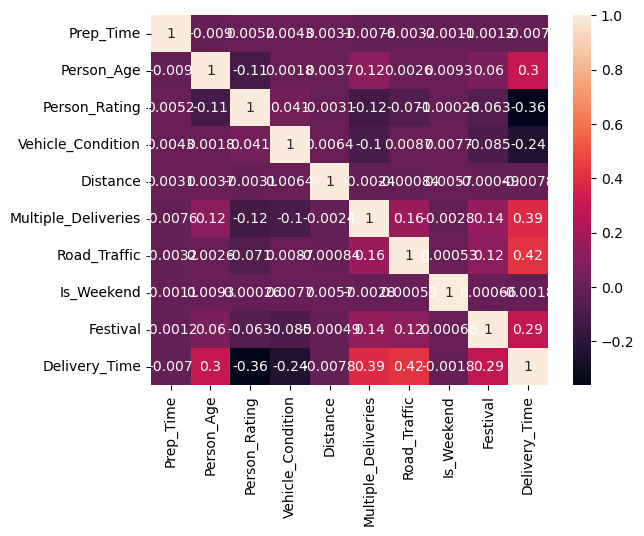

In [34]:
# Heatmap correlation
sns.heatmap(df.corr(numeric_only = True), annot = True)

In [35]:
# Sort correlation value
df.select_dtypes(include = np.number).corr()['Delivery_Time'].sort_values(ascending = False)

Delivery_Time          1.000000
Road_Traffic           0.419920
Multiple_Deliveries    0.386661
Person_Age             0.296467
Festival               0.292755
Is_Weekend            -0.001819
Prep_Time             -0.006971
Distance              -0.007808
Vehicle_Condition     -0.241514
Person_Rating         -0.361104
Name: Delivery_Time, dtype: float64

**Top 6 predictors that have highest correlations:**
- Road_Traffic
- Multiple_Deliveries
- Person_Rating
- Person_Age
- Festival
- Vehicle_Condition

### 4.1. Explore numeric columns

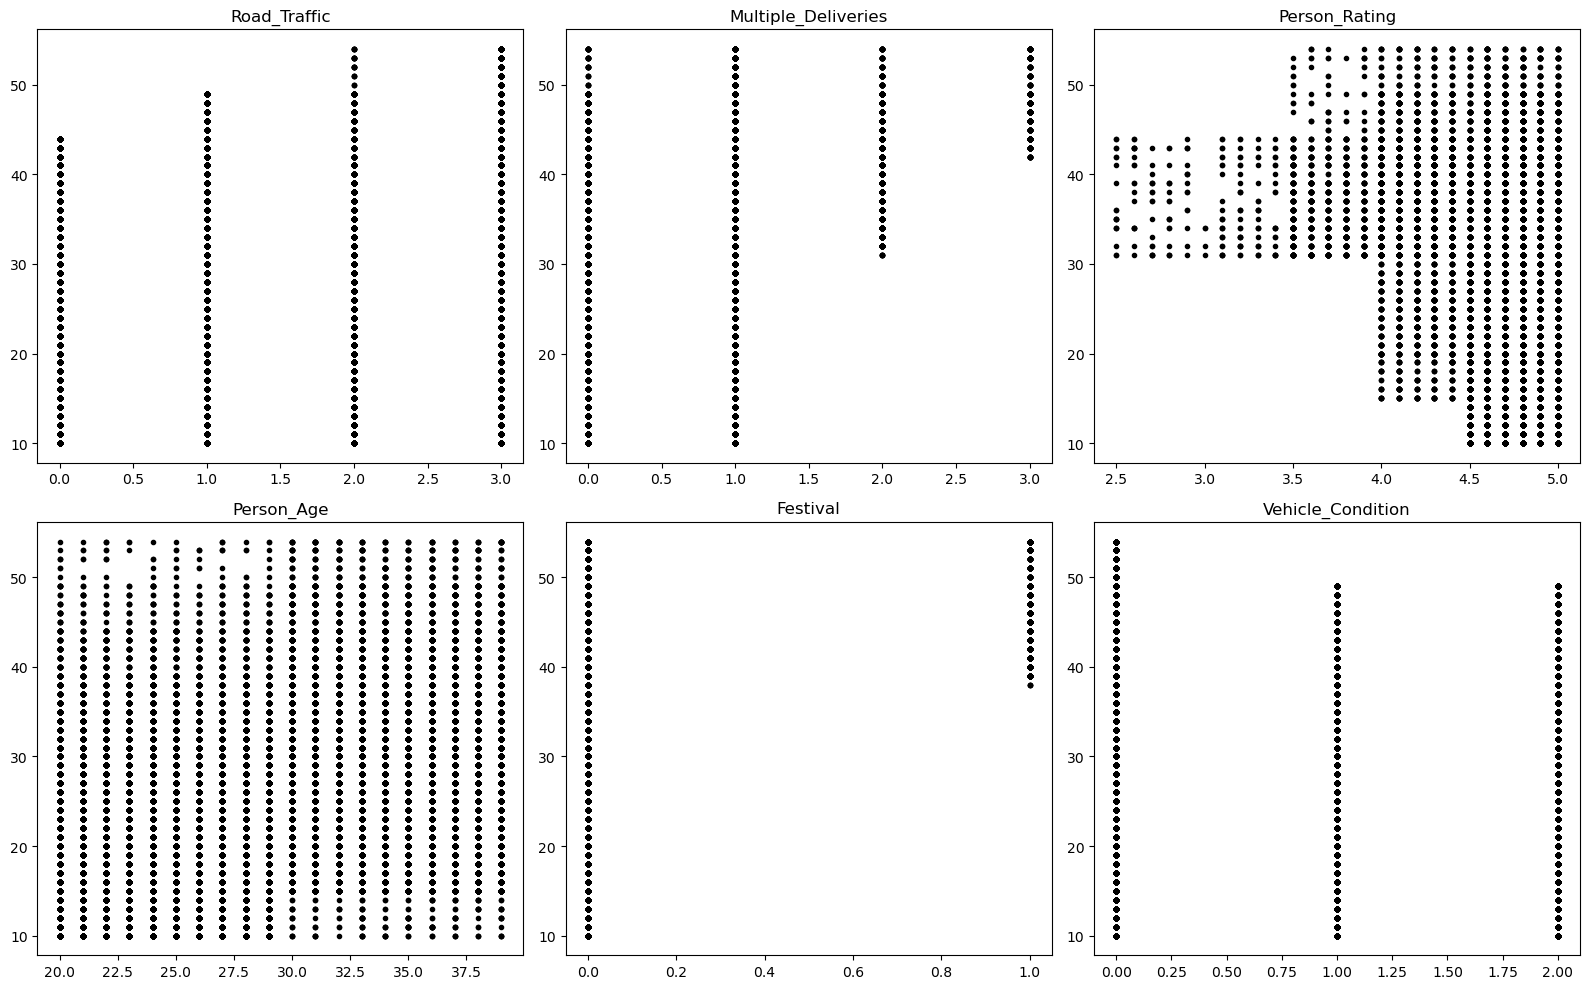

In [36]:
fig, ax = plt.subplots(nrows = 2, ncols = 3, figsize=(16, 10))

numeric_cols = ['Road_Traffic', 'Multiple_Deliveries', 'Person_Rating', 'Person_Age', 'Festival', 'Vehicle_Condition']
outcome = 'Delivery_Time'
k = 0

for i in range(2):
    for j in range(3):
        current_column = numeric_cols[k]
        ax[i][j].scatter(df[current_column], df[outcome], color = 'k', marker = ".")
        ax[i][j].set_title(current_column)
        k += 1

plt.tight_layout()
plt.show()

### 4.2. Explore object columns

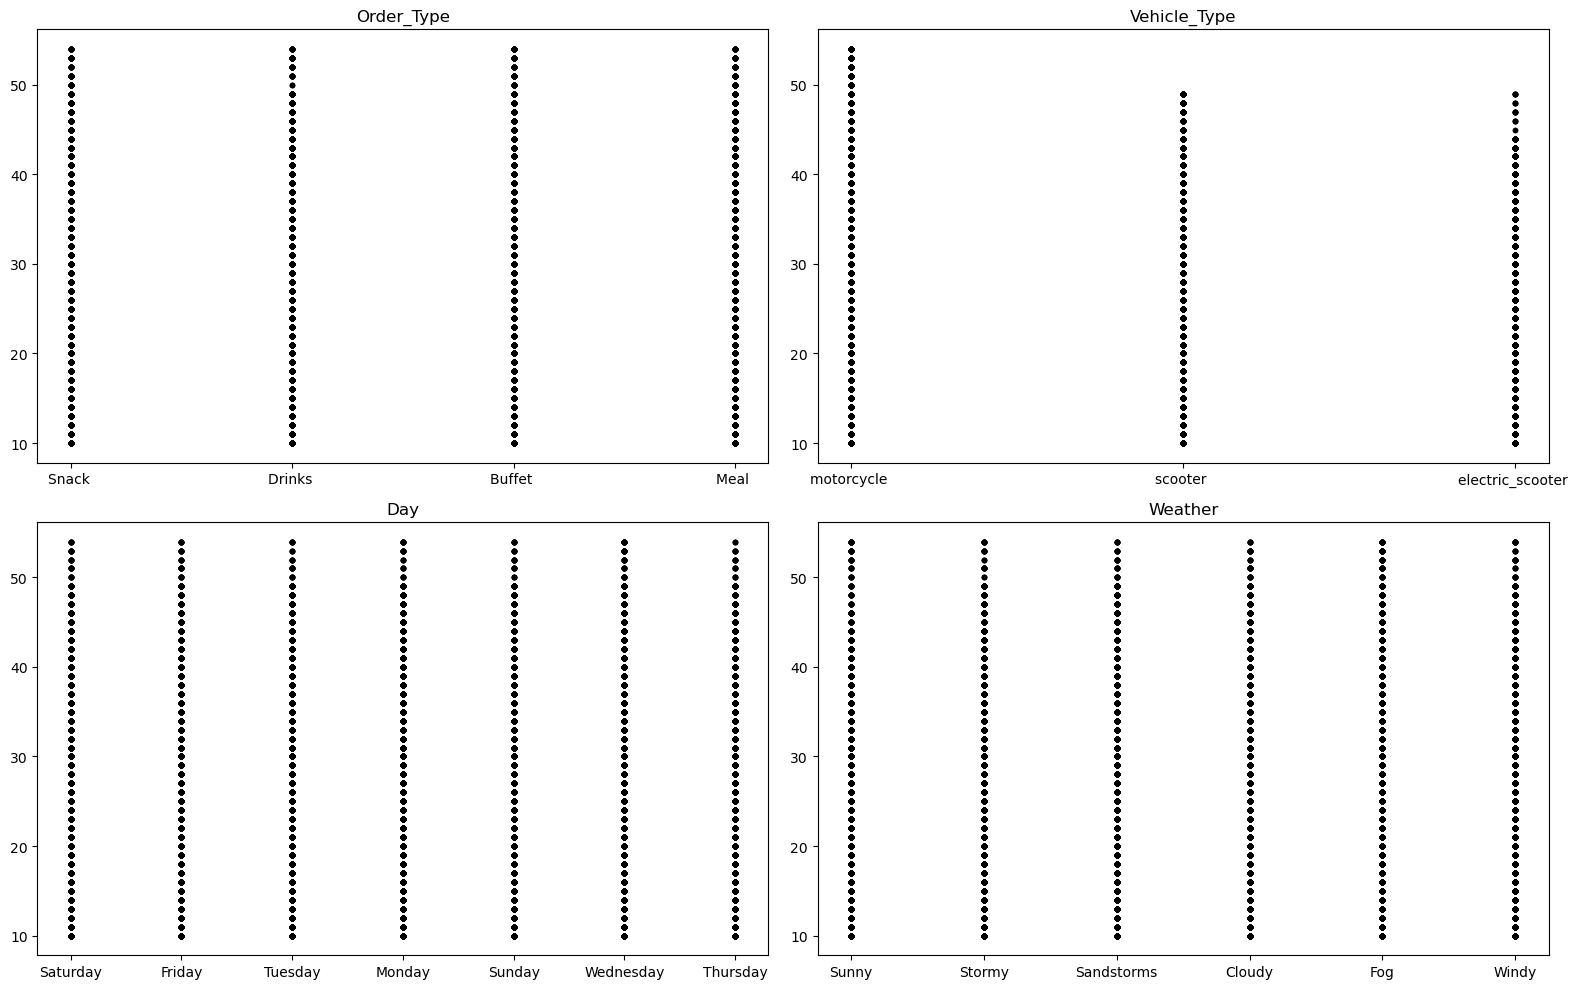

In [37]:
fig, ax = plt.subplots(nrows = 2, ncols = 2, figsize=(16, 10))

# object_cols = list(df.select_dtypes(include = ['object']).columns)
object_cols = ['Order_Type', 'Vehicle_Type', 'Day', 'Weather']
outcome = 'Delivery_Time'
k = 0

for i in range(2):
    for j in range(2):
        current_column = object_cols[k]
        ax[i][j].scatter(df[current_column], df[outcome], color = 'k', marker = ".")
        ax[i][j].set_title(current_column)
        k += 1

plt.tight_layout()
plt.show()

## 5. Regression Model

In [38]:
class StatsmodelsRegressor(BaseEstimator, RegressorMixin):
    """ A universal sklearn-style wrapper for statsmodels regressors """
    
    def __init__(self, sm_class, sm_formula):
        self.sm_class = sm_class
        self.sm_formula = sm_formula
        self.model = None
        self.result = None
 
    def fit(self, data, dummy):
        self.model = self.sm_class(self.sm_formula, data)
        self.result = self.model.fit()
 
    def predict(self,X):
        return self.result.predict(X)

def kfold_split(data, n_fold):
    """
    Function to combine estimated coefficients and standard error in one DataFrame
    :param results: <statsmodels RegressionResultsWrapper> OLS regression results from statsmodel
    :param n_fold: <int> Number of fold in k-fold CV
    :return df: <pandas DataFrame>  combined estimated coefficient and standard error of model estimate
    """
    kfold = KFold(n_splits = n_fold, 
                  shuffle = True, 
                  random_state = 47)
    fold_train = {}
    fold_test = {}

    for i, (train, test) in enumerate(kfold.split(data)):
        print(f"fold {i + 1}, train data rows: {len(train)}, test data rows: {len(test)}")
        fold_train[i] = data.iloc[train].copy()
        fold_test[i] = data.iloc[test].copy()
        
    return (fold_train, fold_test)

In [39]:
df.describe().T

count       mean       std        min        25%  \
Prep_Time            37402.0   9.995054  4.085835   5.000000   5.000000   
Person_Age           37402.0  29.614459  5.768616  20.000000  25.000000   
Person_Rating        37402.0   4.632990  0.316410   2.500000   4.500000   
Vehicle_Condition    37402.0   0.996524  0.818844   0.000000   0.000000   
Distance             37402.0   9.746832  5.599935   1.463837   4.654149   
Multiple_Deliveries  37402.0   0.748730  0.573856   0.000000   0.000000   
Road_Traffic         37402.0   1.396663  1.246423   0.000000   0.000000   
Is_Weekend           37402.0   0.274130  0.446081   0.000000   0.000000   
Festival             37402.0   0.020427  0.141457   0.000000   0.000000   
Delivery_Time        37402.0  26.571173  9.335050  10.000000  19.000000   

                           50%        75%        max  
Prep_Time            10.000000  15.000000  15.000000  
Person_Age           30.000000  35.000000  39.000000  
Person_Rating         4.700000   4.900000   5.000000  
Vehicle_Condition     1.000000   2.000000   2.000000  
Distance              9.204185  13.660334  20.942906  
Multiple_Deliveries   1.000000   1.000000   3.000000  
Road_Traffic          1.000000   3.000000   3.000000  
Is_Weekend            0.000000   1.000000   1.000000  
Festival              0.000000   0.000000   1.000000  
Delivery_Time        26.000000  33.000000  54.000000

#### Centering value

In [40]:
# Centering value for 'Person_Rating' column
df['c_Person_Rating'] = df['Person_Rating'] - df['Person_Rating'].mean()
df['c_Person_Rating']

0        0.26701
1       -0.13299
2       -0.23299
3        0.06701
4       -0.03299
          ...   
37397   -0.03299
37398    0.36701
37399    0.06701
37400   -1.03299
37401   -0.03299
Name: c_Person_Rating, Length: 37402, dtype: float64

In [41]:
# Centering value for 'Person_Age' column
df['c_Person_Age'] = df['Person_Age'] - df['Person_Age'].mean()
df['c_Person_Age']

0        7.385541
1        4.385541
2       -6.614459
3        8.385541
4        2.385541
           ...   
37397    5.385541
37398    3.385541
37399   -7.614459
37400    5.385541
37401   -0.614459
Name: c_Person_Age, Length: 37402, dtype: float64

#### Define the model to fit the data

In [42]:
# Create a class model

ols_delivery_time = StatsmodelsRegressor(smf.ols, 'Delivery_Time ~ Road_Traffic + Multiple_Deliveries + c_Person_Rating +\
c_Person_Age + Festival + Vehicle_Condition + Vehicle_Type')

#### Data Splitting Results

In [43]:
fold_train, fold_test = kfold_split(data = df, n_fold = 5)

fold 1, train data rows: 29921, test data rows: 7481
fold 2, train data rows: 29921, test data rows: 7481
fold 3, train data rows: 29922, test data rows: 7480
fold 4, train data rows: 29922, test data rows: 7480
fold 5, train data rows: 29922, test data rows: 7480


In [44]:
fold_train[0]

Order_Type  Prep_Time  Person_Age  Person_Rating Vehicle_Type  \
0         Snack        15.0        37.0            4.9  motorcycle    
1         Snack         5.0        34.0            4.5     scooter    
2        Drinks        15.0        23.0            4.4  motorcycle    
3        Buffet        10.0        38.0            4.7  motorcycle    
4         Snack        15.0        32.0            4.6     scooter    
...          ...        ...         ...            ...          ...   
37394    Drinks        15.0        35.0            4.0  motorcycle    
37396    Drinks        15.0        22.0            4.6  motorcycle    
37397    Drinks        10.0        35.0            4.6  motorcycle    
37398      Meal        15.0        33.0            5.0  motorcycle    
37401    Buffet        15.0        29.0            4.6  motorcycle    

       Vehicle_Condition   Distance  Multiple_Deliveries  Road_Traffic  \
0                      2   3.020737                  0.0             2   
1                      2  20.143737                  1.0             3   
2                      0   1.549693                  1.0             0   
3                      0   7.774497                  1.0             1   
4                      1   6.197898                  1.0             2   
...                  ...        ...                  ...           ...   
37394                  0   3.059026                  1.0             2   
37396                  1  10.432848                  1.0             1   
37397                  2  16.576800                  1.0             0   
37398                  0   1.488112                  0.0             2   
37401                  0  12.057294                  0.0             0   

            Day  Is_Weekend     Weather  Festival  Delivery_Time  \
0      Saturday           1       Sunny         0           24.0   
1        Friday           0      Stormy         0           33.0   
2      Saturday           1  Sandstorms         0           26.0   
3       Tuesday           0       Sunny         0           21.0   
4      Saturday           1      Cloudy         0           30.0   
...         ...         ...         ...       ...            ...   
37394  Thursday           0      Cloudy         0           34.0   
37396   Tuesday           0       Windy         0           25.0   
37397    Friday           0  Sandstorms         0           24.0   
37398  Saturday           1         Fog         0           27.0   
37401  Thursday           0      Cloudy         0           16.0   

       c_Person_Rating  c_Person_Age  
0              0.26701      7.385541  
1             -0.13299      4.385541  
2             -0.23299     -6.614459  
3              0.06701      8.385541  
4             -0.03299      2.385541  
...                ...           ...  
37394         -0.63299      5.385541  
37396         -0.03299     -7.614459  
37397         -0.03299      5.385541  
37398          0.36701      3.385541  
37401         -0.03299     -0.614459  

[29921 rows x 16 columns]

In [45]:
fold_test[0]

Order_Type  Prep_Time  Person_Age  Person_Rating       Vehicle_Type  \
9         Snack        15.0        36.0            4.2        motorcycle    
11       Drinks        10.0        23.0            4.7           scooter    
13        Snack        15.0        24.0            4.7           scooter    
19         Meal        15.0        31.0            4.7  electric_scooter    
21         Meal        15.0        33.0            4.3           scooter    
...          ...        ...         ...            ...                ...   
37392    Drinks        15.0        22.0            4.1        motorcycle    
37393     Snack        10.0        21.0            4.6        motorcycle    
37395      Meal        10.0        31.0            4.7        motorcycle    
37399    Drinks        10.0        22.0            4.7        motorcycle    
37400    Drinks        15.0        35.0            3.6        motorcycle    

       Vehicle_Condition   Distance  Multiple_Deliveries  Road_Traffic  \
9                      2  10.271464                  3.0             3   
11                     1  13.764306                  1.0             1   
13                     1  19.373484                  1.0             3   
19                     2   1.554950                  0.0             0   
21                     2   6.106737                  1.0             3   
...                  ...        ...                  ...           ...   
37392                  0   7.845173                  1.0             3   
37393                  1   4.553635                  1.0             3   
37395                  0   3.098713                  1.0             0   
37399                  0  10.983242                  0.0             0   
37400                  2   4.648024                  1.0             3   

             Day  Is_Weekend     Weather  Festival  Delivery_Time  \
9       Saturday           1         Fog         0           46.0   
11        Friday           0  Sandstorms         0           21.0   
13        Monday           0         Fog         0           41.0   
19      Thursday           0  Sandstorms         0           26.0   
21        Sunday           1       Windy         0           39.0   
...          ...         ...         ...       ...            ...   
37392   Saturday           1      Stormy         0           36.0   
37393     Monday           0  Sandstorms         0           15.0   
37395  Wednesday           0  Sandstorms         0           26.0   
37399     Sunday           1       Sunny         0           20.0   
37400     Friday           0       Sunny         0           31.0   

       c_Person_Rating  c_Person_Age  
9             -0.43299      6.385541  
11             0.06701     -6.614459  
13             0.06701     -5.614459  
19             0.06701      1.385541  
21            -0.33299      3.385541  
...                ...           ...  
37392         -0.53299     -7.614459  
37393         -0.03299     -8.614459  
37395          0.06701      1.385541  
37399          0.06701     -7.614459  
37400         -1.03299      5.385541  

[7481 rows x 16 columns]

#### Evaluate the model using K-fold cross validation

In [46]:
# Create k-fold splitter object

kfold = KFold(n_splits = 5, shuffle = True, random_state = 47)

#### Calculate performance for each model

In [47]:
scores_ols = cross_val_score(estimator = ols_delivery_time,
                             X = df,
                             y = df['Delivery_Time'],
                             cv = kfold,
                             scoring = "r2")

scores_ols = pd.DataFrame(data = scores_ols,
                          columns = ['test_rsquared'])

scores_ols["folds"] = [f"Folds {i + 1}" for i in range(5)]
scores_ols

test_rsquared    folds
0       0.501857  Folds 1
1       0.491814  Folds 2
2       0.490870  Folds 3
3       0.491325  Folds 4
4       0.493038  Folds 5

In [48]:
scores_ols["test_rsquared"].mean()

0.4937808183759783

### Fit Linear Regression

In [49]:
# Create OLS model object
model = smf.ols('Delivery_Time ~ Road_Traffic + Multiple_Deliveries + c_Person_Rating +\
                c_Person_Age + Festival + Vehicle_Condition + Vehicle_Type', df)

# Fit the model
results = model.fit()

# Extract the results
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:          Delivery_Time   R-squared:                       0.494
Model:                            OLS   Adj. R-squared:                  0.494
Method:                 Least Squares   F-statistic:                     4565.
Date:                Fri, 05 Jan 2024   Prob (F-statistic):               0.00
Time:                        11:57:24   Log-Likelihood:            -1.2388e+05
No. Observations:               37402   AIC:                         2.478e+05
Df Residuals:                   37393   BIC:                         2.478e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept         

#### Residual Plot and Explained Variance

Text(0.5, 1.0, 'Residual vs. Predicted Delivery Time')

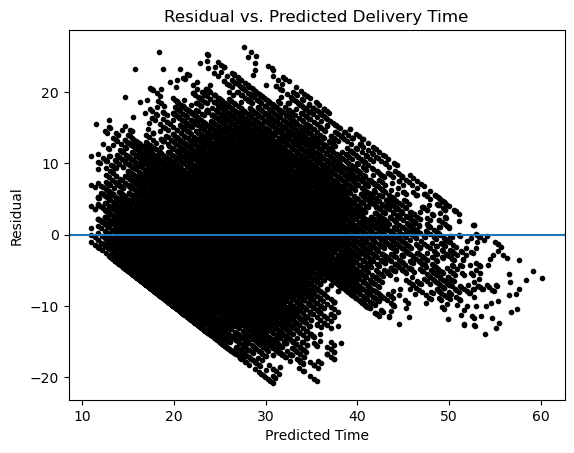

In [50]:
plt.scatter(results.fittedvalues, results.resid, marker = ".", c = "k")

# Plot the horizontal line in 0 as the fitted line
plt.axhline([0])

plt.xlabel("Predicted Time")
plt.ylabel("Residual")
plt.title(f"Residual vs. Predicted Delivery Time")

#### Normality of error assumption 

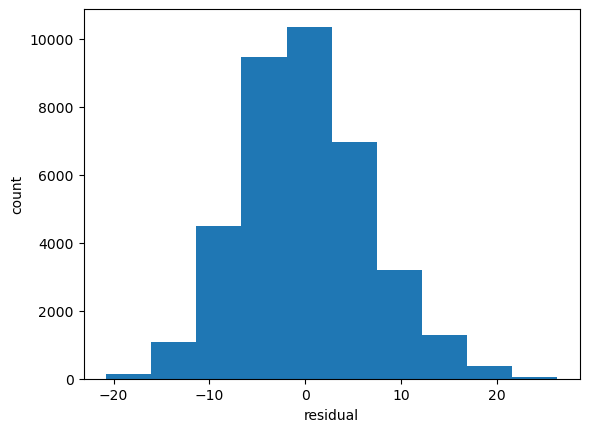

In [51]:
plt.hist(results.resid)
plt.xlabel("residual")
plt.ylabel("count")

plt.show()

## 6. Model Result

**1. Predictive modeling**
- The equation of the model is shown below:\
    Delivery_Time = 22.71+ (-0.44 x motorcycle) + (-0.93 x scooter) + (2.58 x Road_Traffic) + (3.68 x Multiple_Deliveries) + (-7.79 x Person_Rating) + (0.37 x centered_Age) + (11.24 x Festival) + (-2.17 x Vehicle_Condition)
- Having an R-squared score of 0.494, the model indicates that approximately 49.4% of the variability in the dependent variable is explained by the independent variables.

**2. Assessing significance**
- The outcomes reveal that each predictor is statistically significant, indicated by a P-value less than 0.05.

**3. Understanding relationship**
- The intercept means the duration it takes to deliver food when all predictors have a value of 0. The model will predict a food delivery time of 27.71 minutes under specified conditions:
    - the use of an electric scooter
    - low-density traffic
    - no multiple deliveries
    - an average person rating of 4.6
    - an average person age of 29.6
    - no ongoing festival
    - low vehicle condition
- For each additional unit of Road_Traffic, Multiple_Deliveries, centered_Age, and Festival predictors will increase the estimated delivery time.
- Conversely, each additional unit of centered_Rating and Vehicle_Condition will shorten the estimated delivery time.
- Among various vehicle types, the use of a scooter will be the fastest food delivery while all other predictors remain constant.

## 7. Conclusion

- Having an R-squared score of 0.494 is considered a small value. It indicates that there is more than half a portion of the variability in the dependent variable that is not captured by the model.
---
- Linear regression assumes that the model has a linear relationship between variables. If we take a look at the relationship, the assumption of linearity is violated (see the graph below between Time vs Distance).

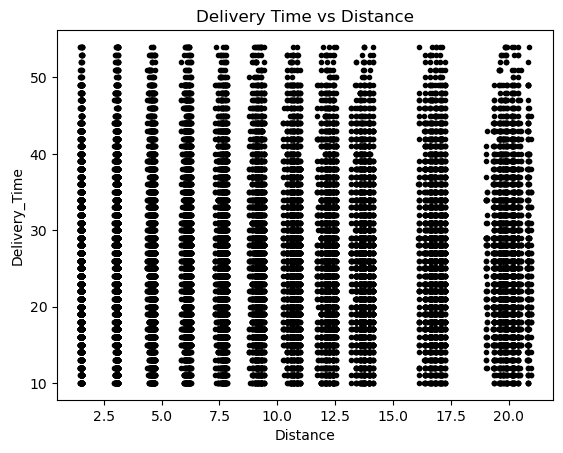

In [114]:
x = df['Distance']
y = df['Delivery_Time']

# Plot the data
plt.scatter(x, y, color = "k", marker = ".")

# Add a legend and labels
plt.xlabel("Distance")
plt.ylabel("Delivery_Time")

# Add a title and adjust the margins
plt.title("Delivery Time vs Distance")

# Show the plot
plt.show()

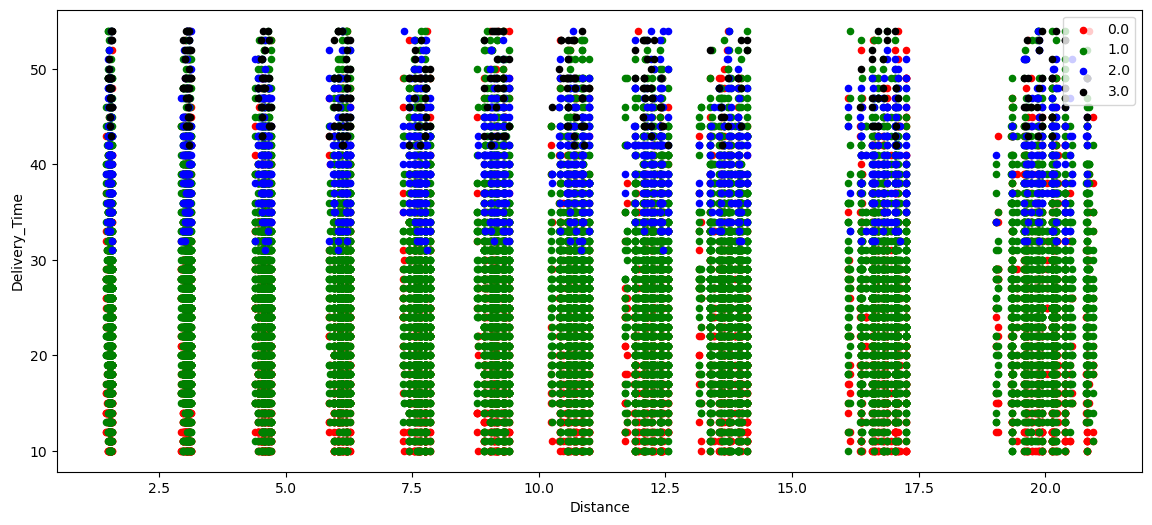

In [119]:
fig, ax = plt.subplots(figsize = (14, 6))

# Define different color for each group data
colors = {0 : 'r', 1 : 'g', 2 : 'b', 3 : 'k'}

grouped = df.groupby('Multiple_Deliveries')

# Plot the data with different color
for key, group in grouped:
    group.plot(ax = ax, kind = 'scatter', x = 'Distance', y = 'Delivery_Time', label = key, color = colors[key])
plt.show()

- The initial assumption from the data is that Time will be proportional to Distance. The farther the distance, the longer the time required. However, the graph tells the opposite way. It is randomly scattered as if no relation exists between Time and Distance.
---
- Filtering some predictors in the data makes apparent that there is a relationship between time and distance.

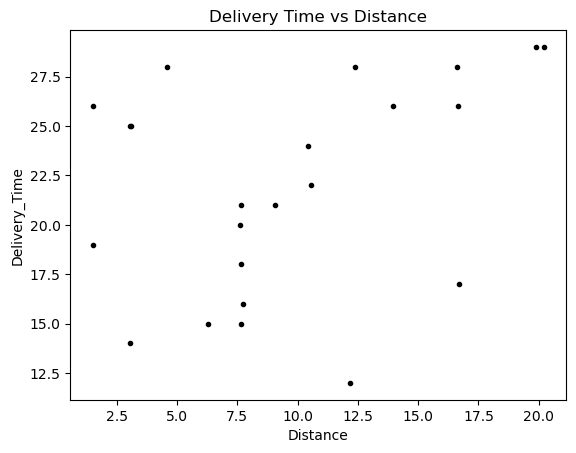

In [52]:
filtered = df[(df['Multiple_Deliveries'] == 0) & (df['Road_Traffic'] == 0) & (df['Weather'] == 'Sunny') &\
              (df['Festival'] == 0) & (df['Person_Age'] >= 24) & (df['Person_Rating'] == 4.5)]

x = filtered['Distance']
y = filtered['Delivery_Time']

# Plot the data
plt.scatter(x, y, color = "k", marker = ".")

# Add a legend and labels
plt.xlabel("Distance")
plt.ylabel("Delivery_Time")

# Add a title and adjust the margins
plt.title("Delivery Time vs Distance")

# Show the plot
plt.show()

In conclusion, it might be more appropriate to apply other regression techniques or complex models in this kind of dataset.

---

In [ ]:
cols = ['Road_Traffic', 'Multiple_Deliveries', 'Person_Rating', 'Person_Age', 'Festival', 'Vehicle_Condition']
outcome = 'Delivery_Time'
num_plots = len(cols)
num_rows = (num_plots // 2) + (num_plots % 2)

fig, axes = plt.subplots(num_rows, 2, figsize=(20, 15))

for i, column_name in enumerate(cols):
    row = i // 2
    col = i % 2

    ax = axes[row, col]
    sns.scatterplot(data=df, x=column_name, y=outcome, ax=ax, color='k', marker='.')
    
    ax.set_xlabel(column_name)
    ax.set_ylabel(outcome)
    ax.set_title(column_name)

if num_plots % 2 != 0:
    fig.delaxes(axes[-1, -1])

plt.tight_layout()
plt.show()

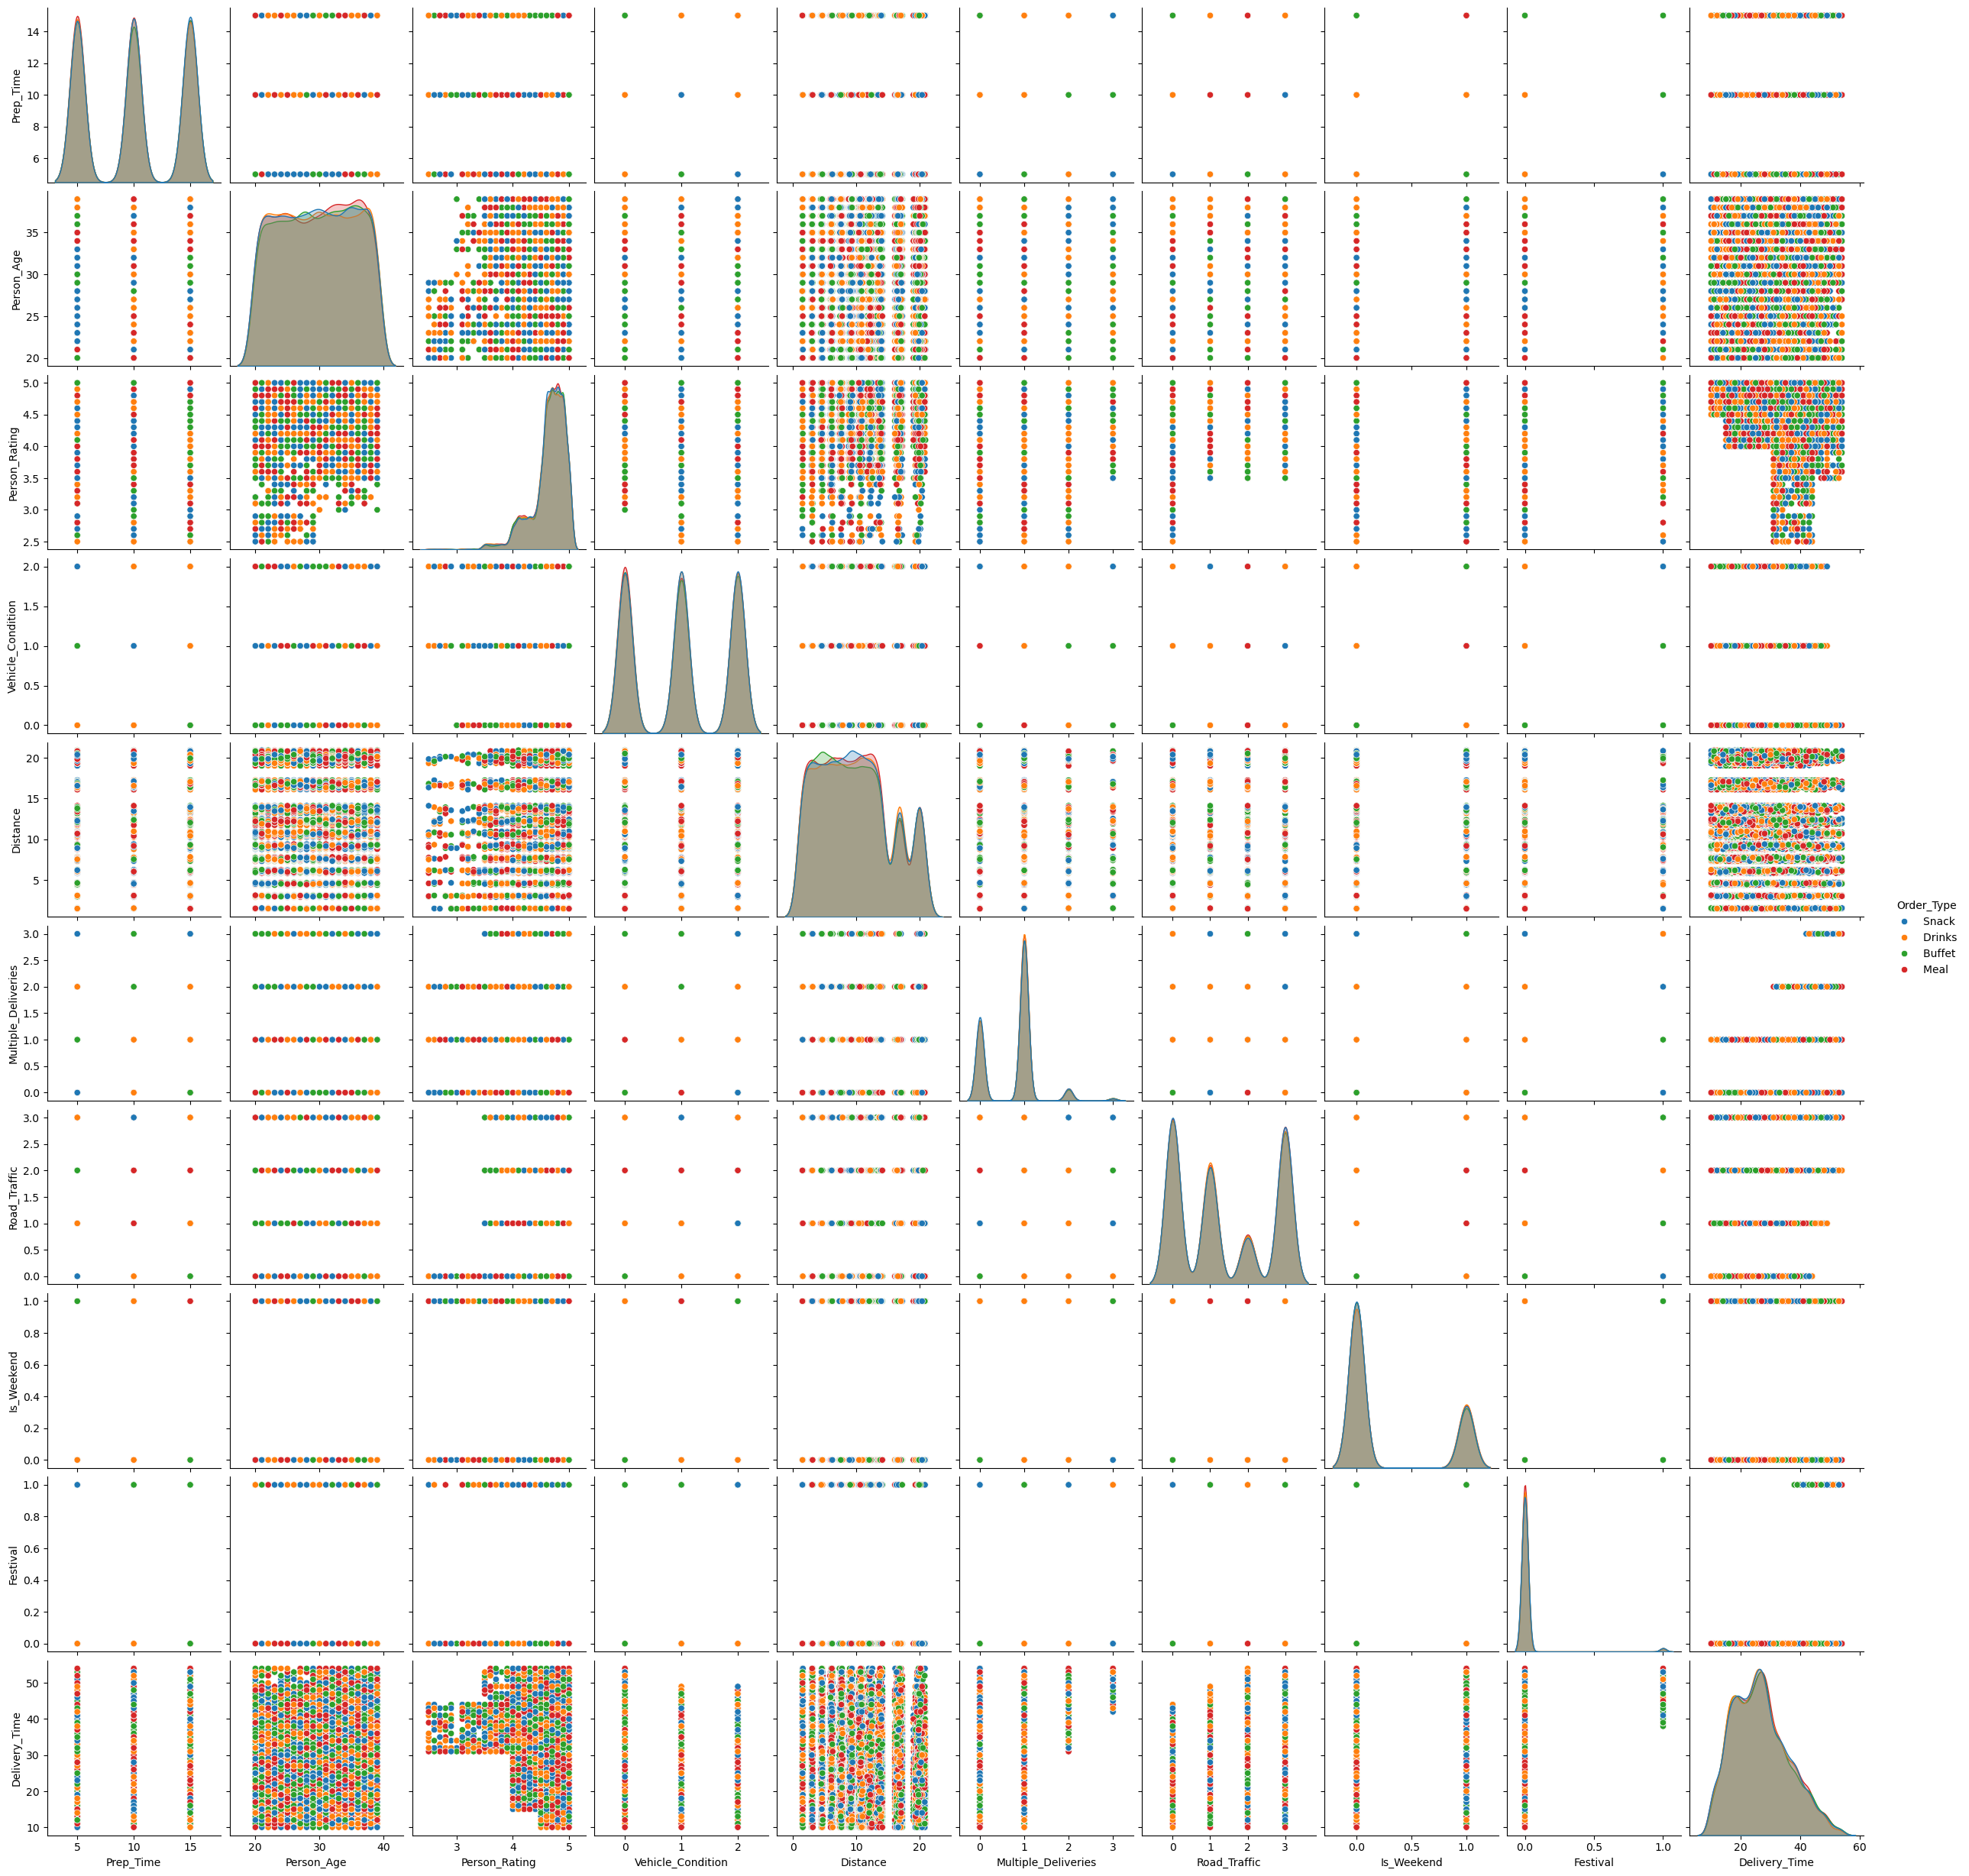

In [39]:
sns.pairplot(df, hue = 'Order_Type')

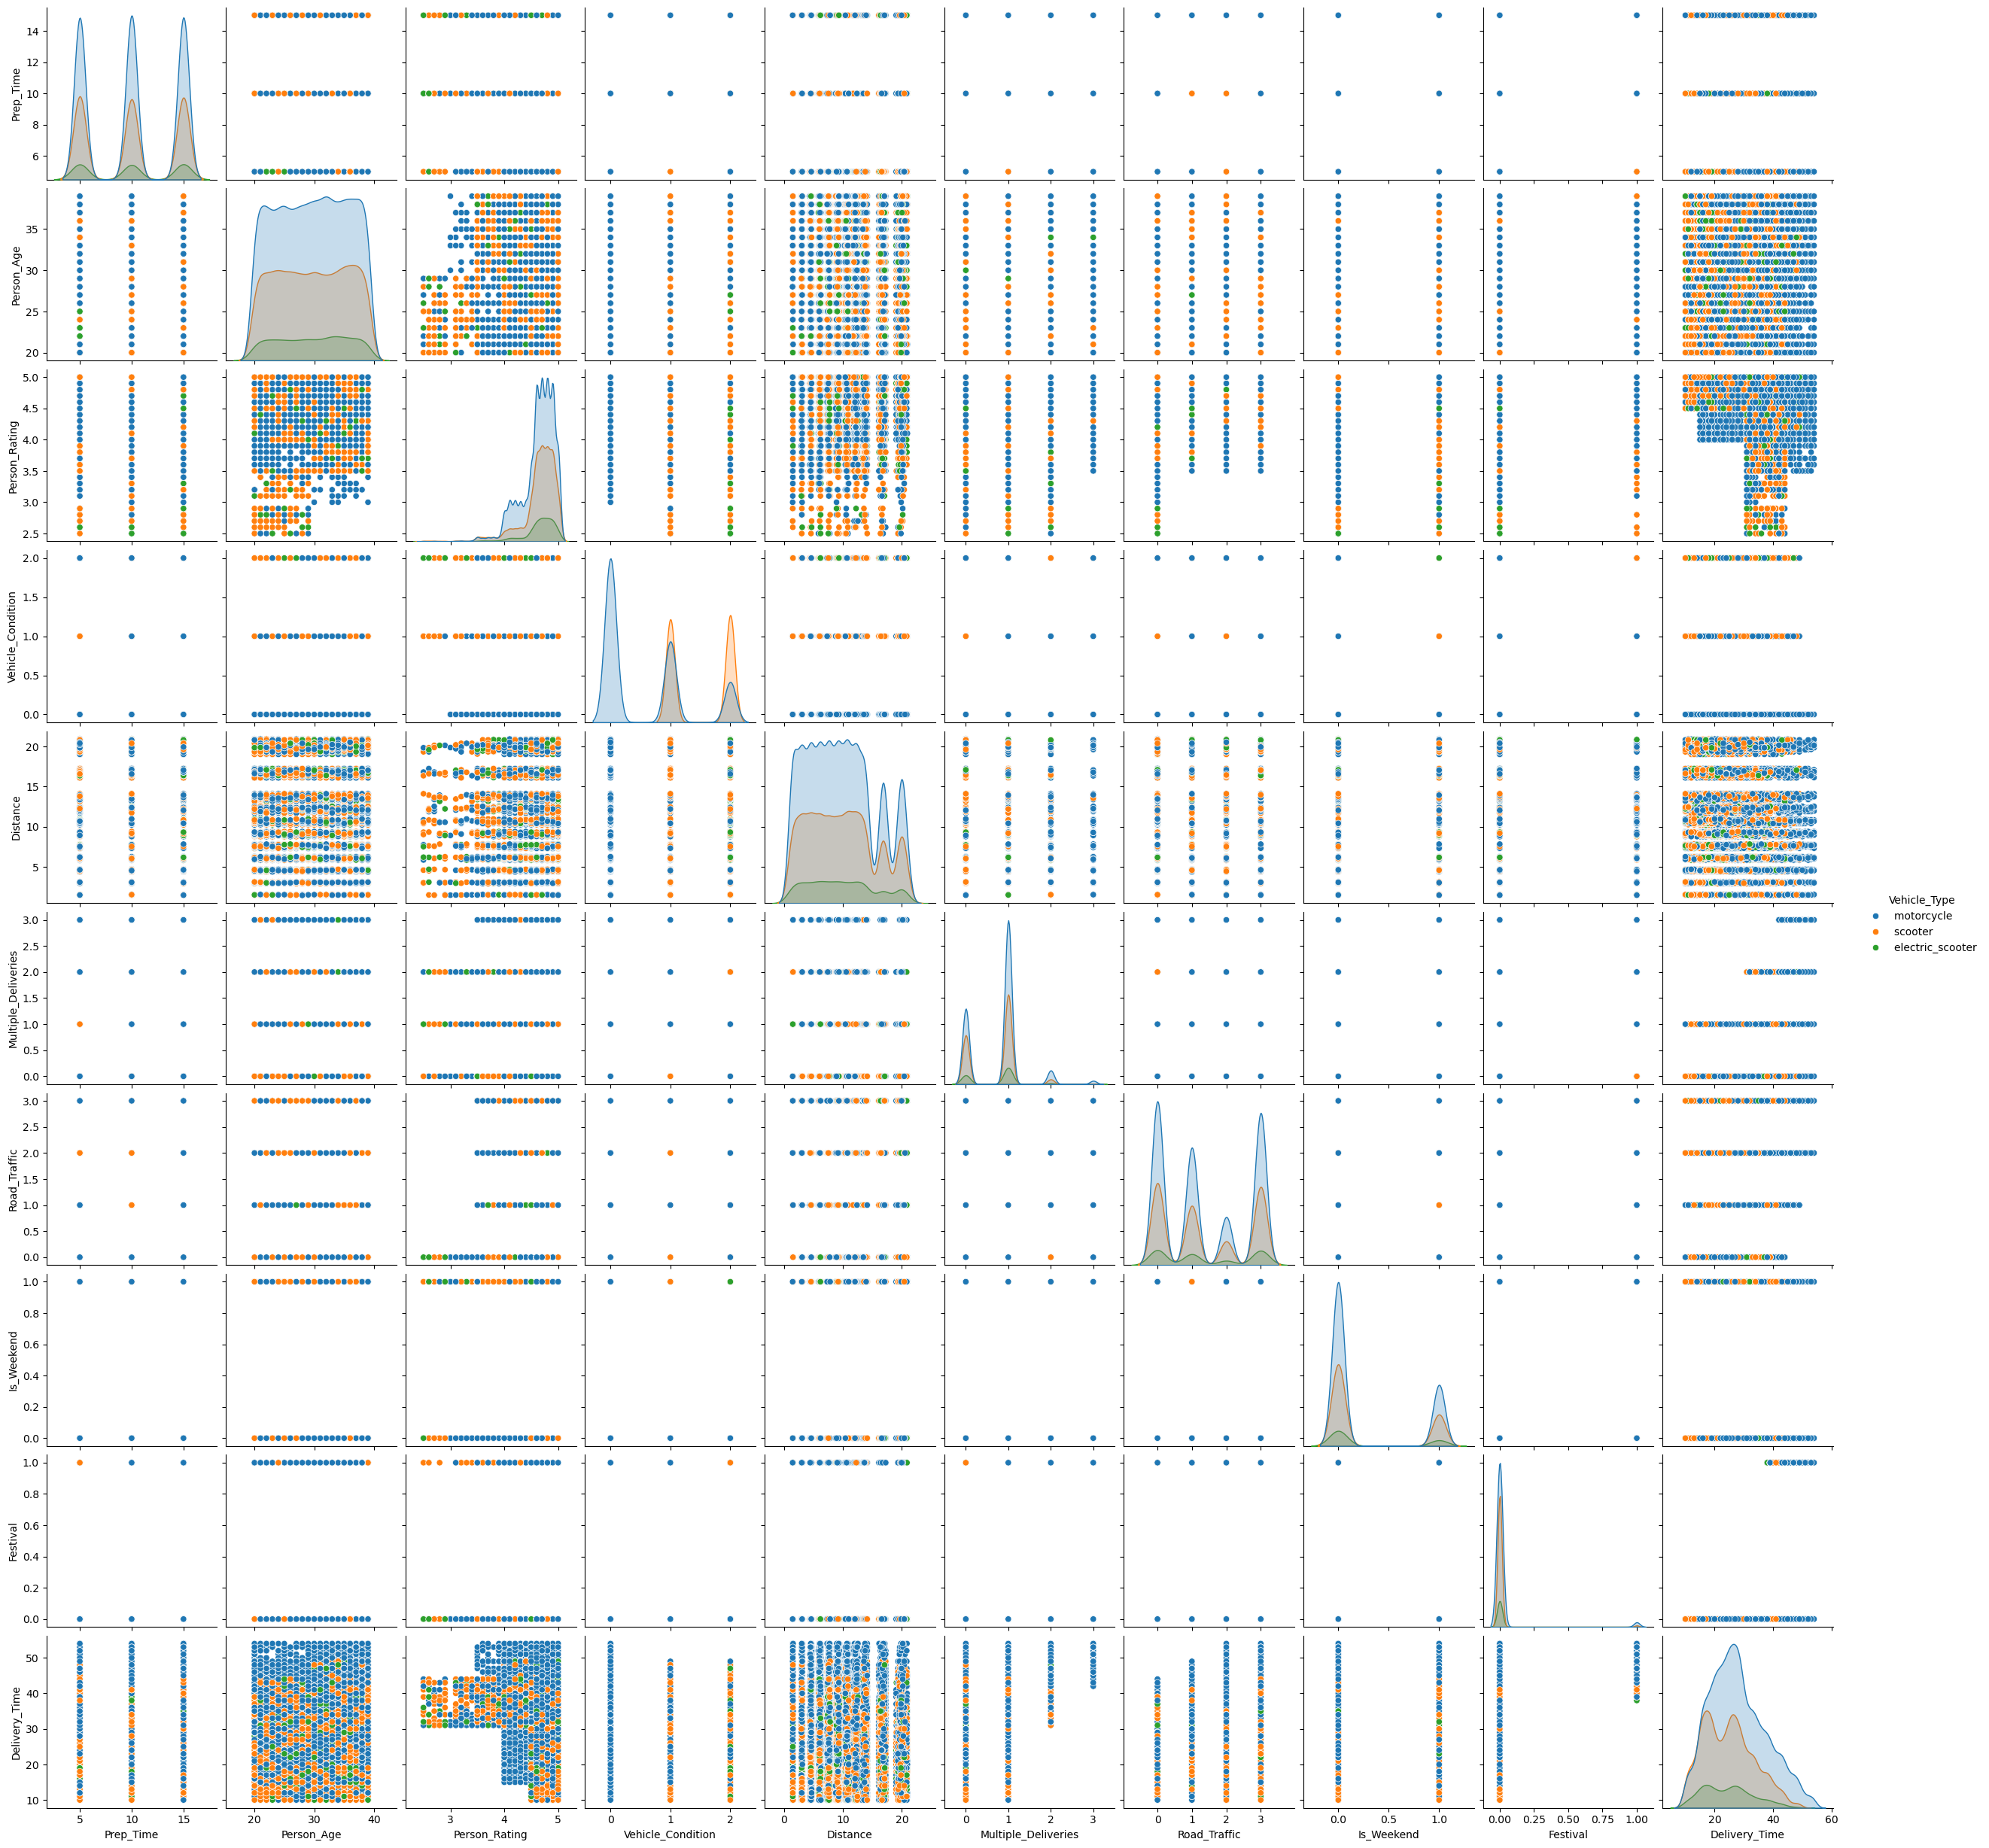

In [38]:
sns.pairplot(df, hue = 'Vehicle_Type')

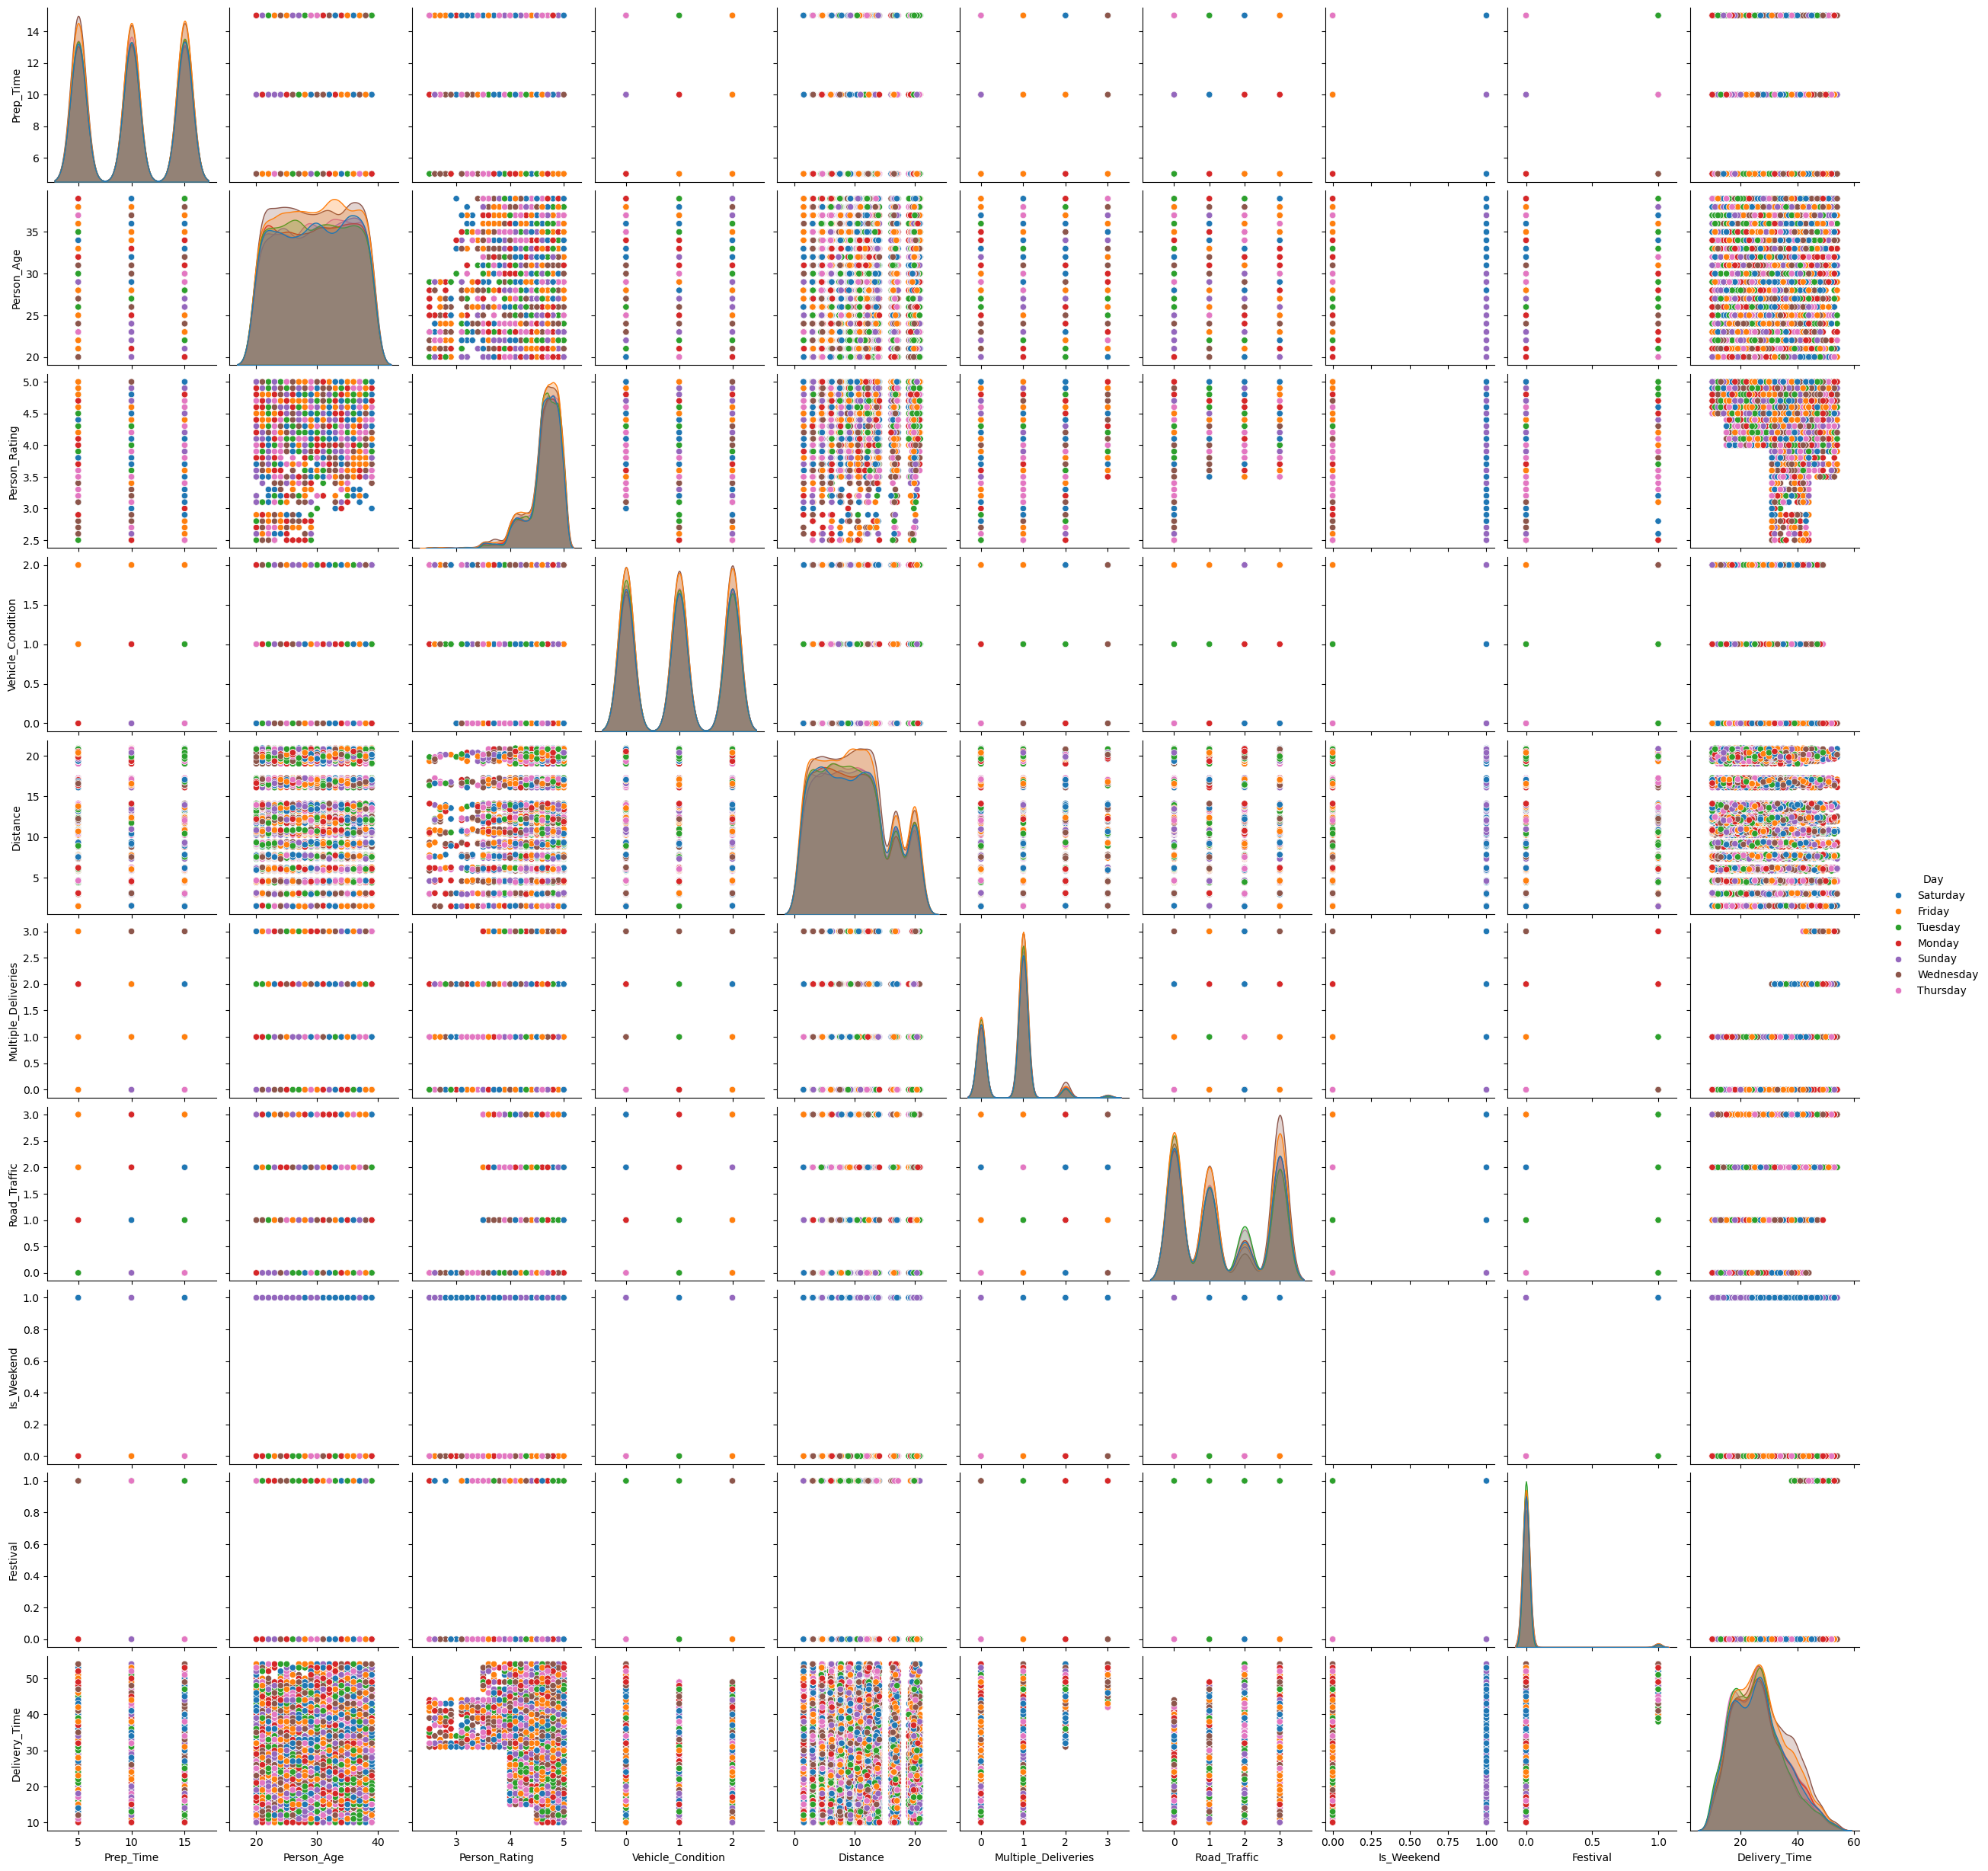

In [40]:
sns.pairplot(df, hue = 'Day')

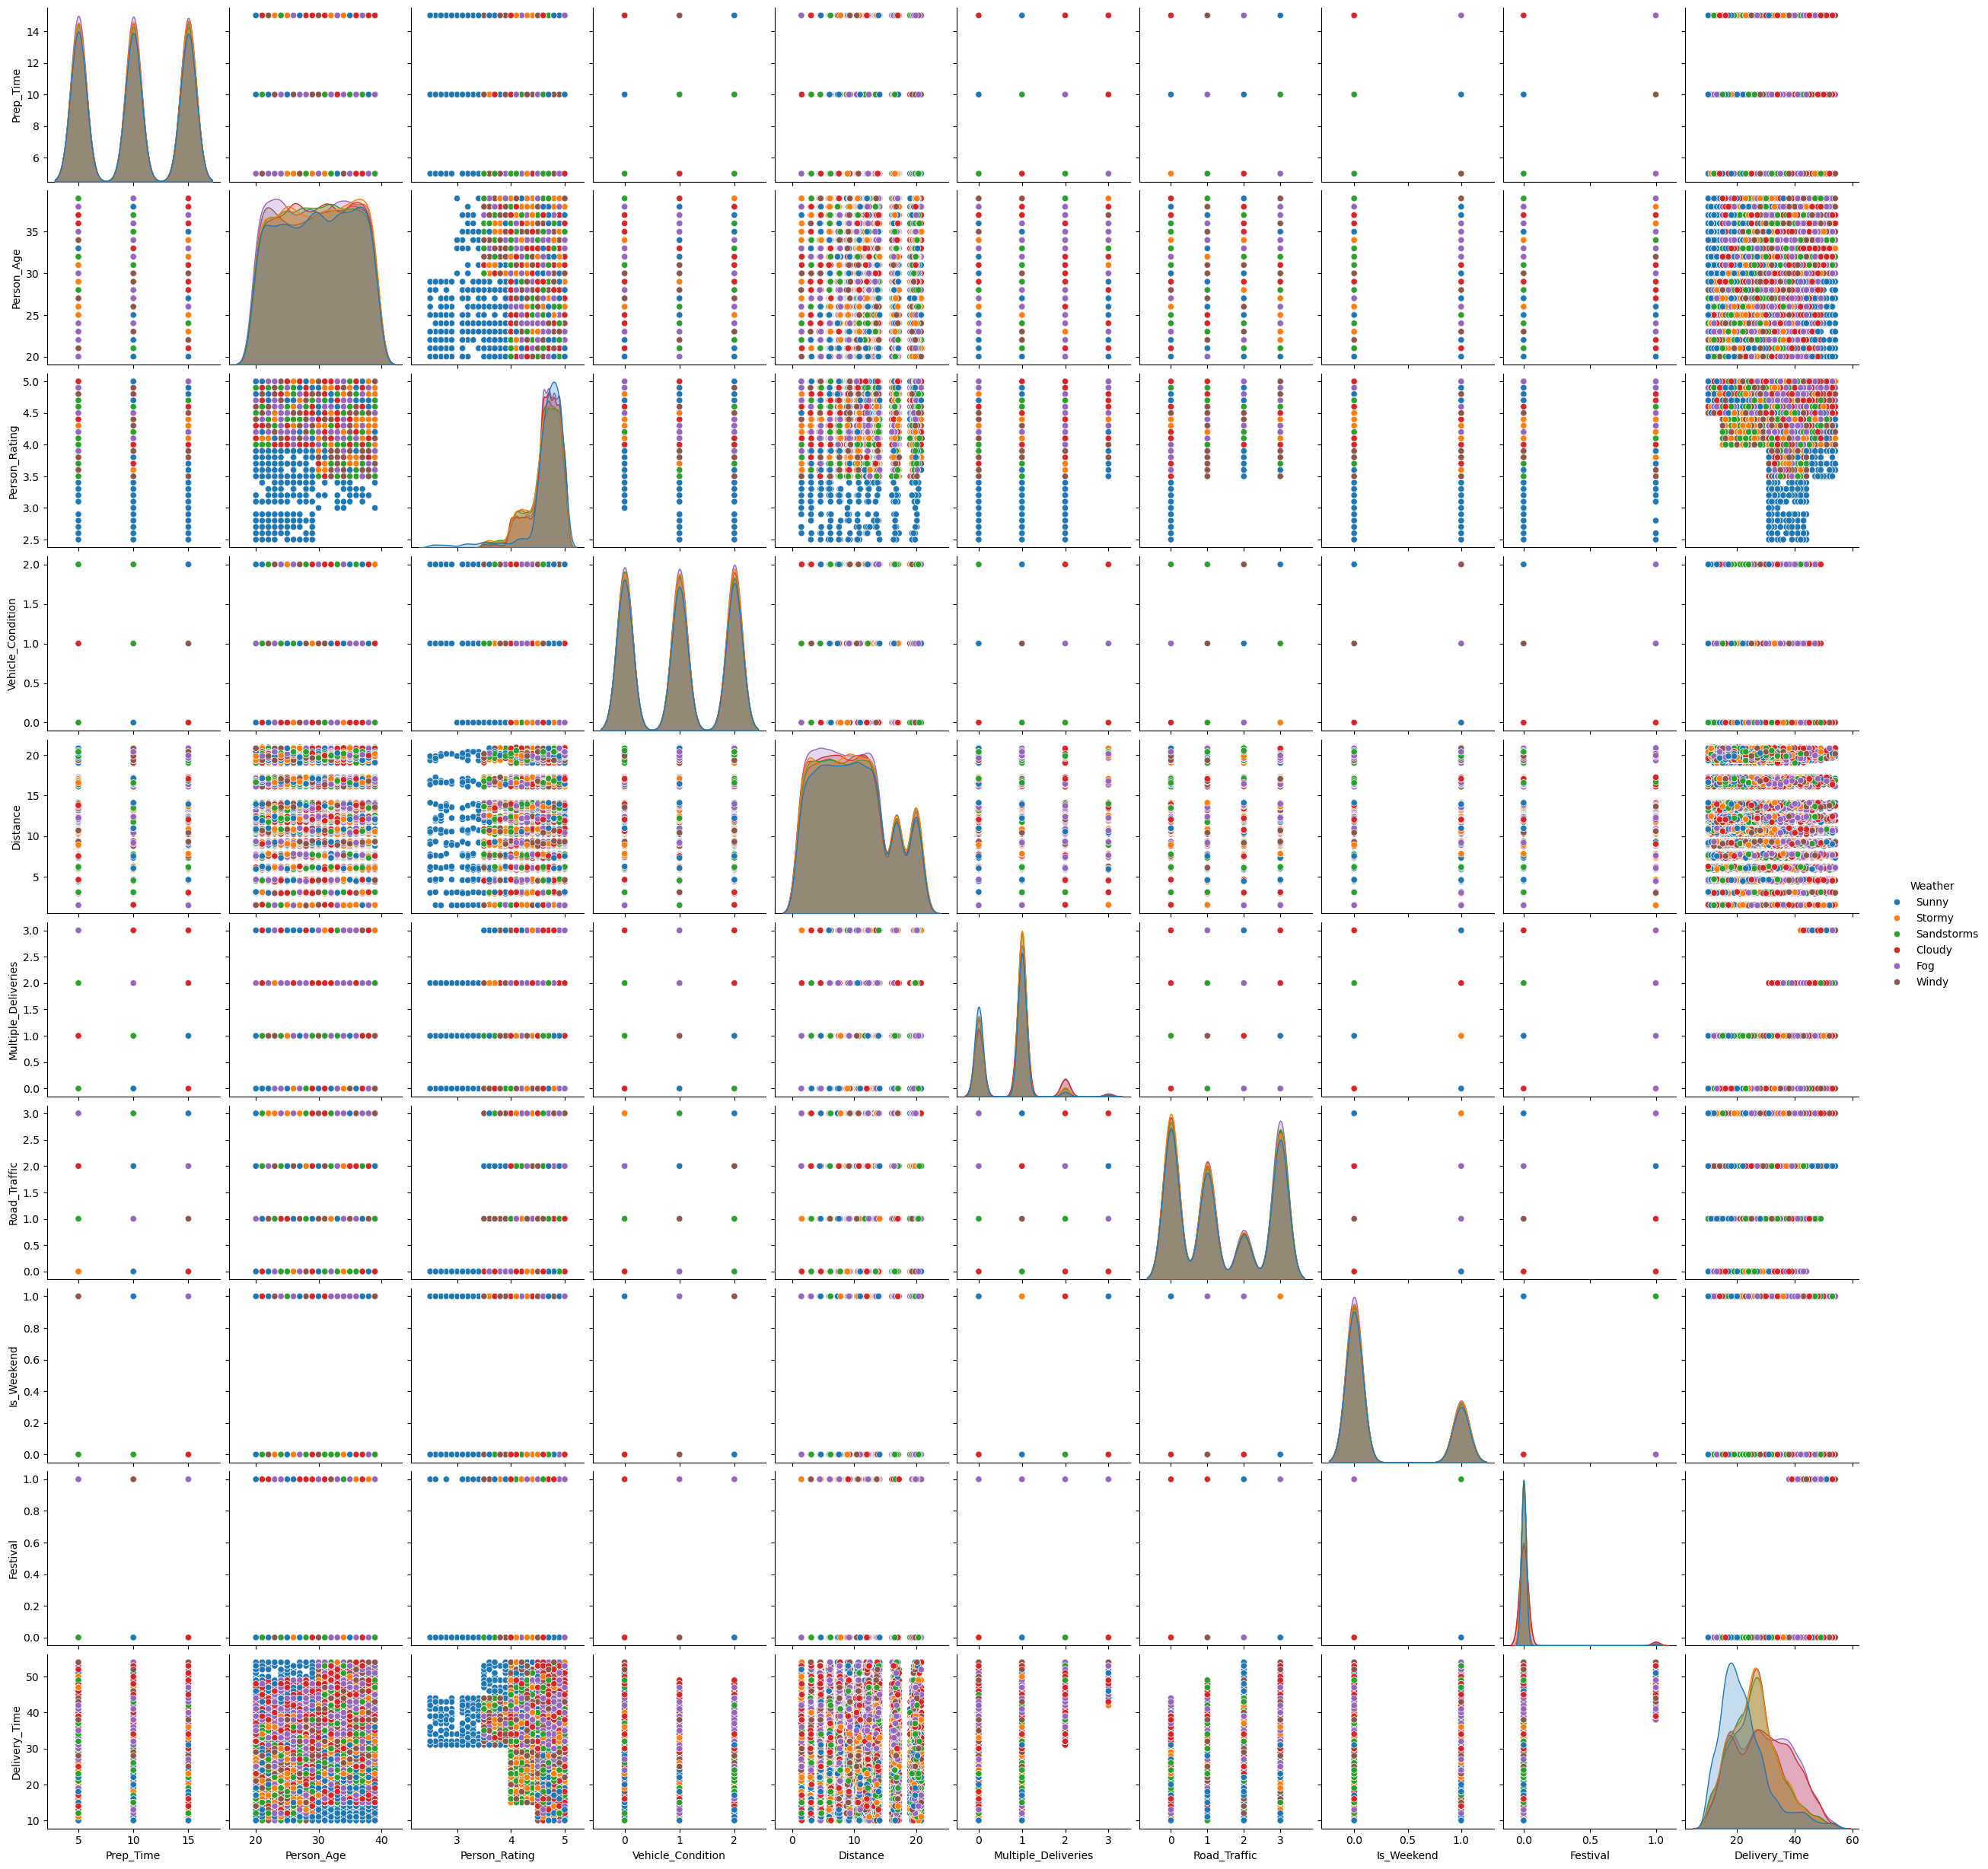

In [41]:
sns.pairplot(df, hue = 'Weather')